In [1]:
library(fpp3)

── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──

✔ tibble      3.2.1     ✔ tsibble     1.1.3
✔ dplyr       1.1.3     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.0     ✔ feasts      0.3.1
✔ lubridate   1.9.3     ✔ fable       0.3.3
✔ ggplot2     3.4.3     ✔ fabletools  0.3.4

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



In [2]:
# few tid bits

# The forecast vaiable y is sometimes also called the regressand, dependent or explained variable. The predictor variables like x are sometimes are also called teh regressors, independent or expalnatory variables. In this book we will always refer to them as the "forecast " variable and "predictor" variables.

# The coefficient b0 and b1 denote the intercept and the slope of the line respectively. The intercept b- represents the predicted value of y when x = 0. The slope b1 represents the average predicted change in y resulting from a one unit increase in x



In [3]:
options(repr.plot.width = 20, repr.plot.height = 10)

[[1]]

$y
[1] "% change"

attr(,"class")
[1] "labels"

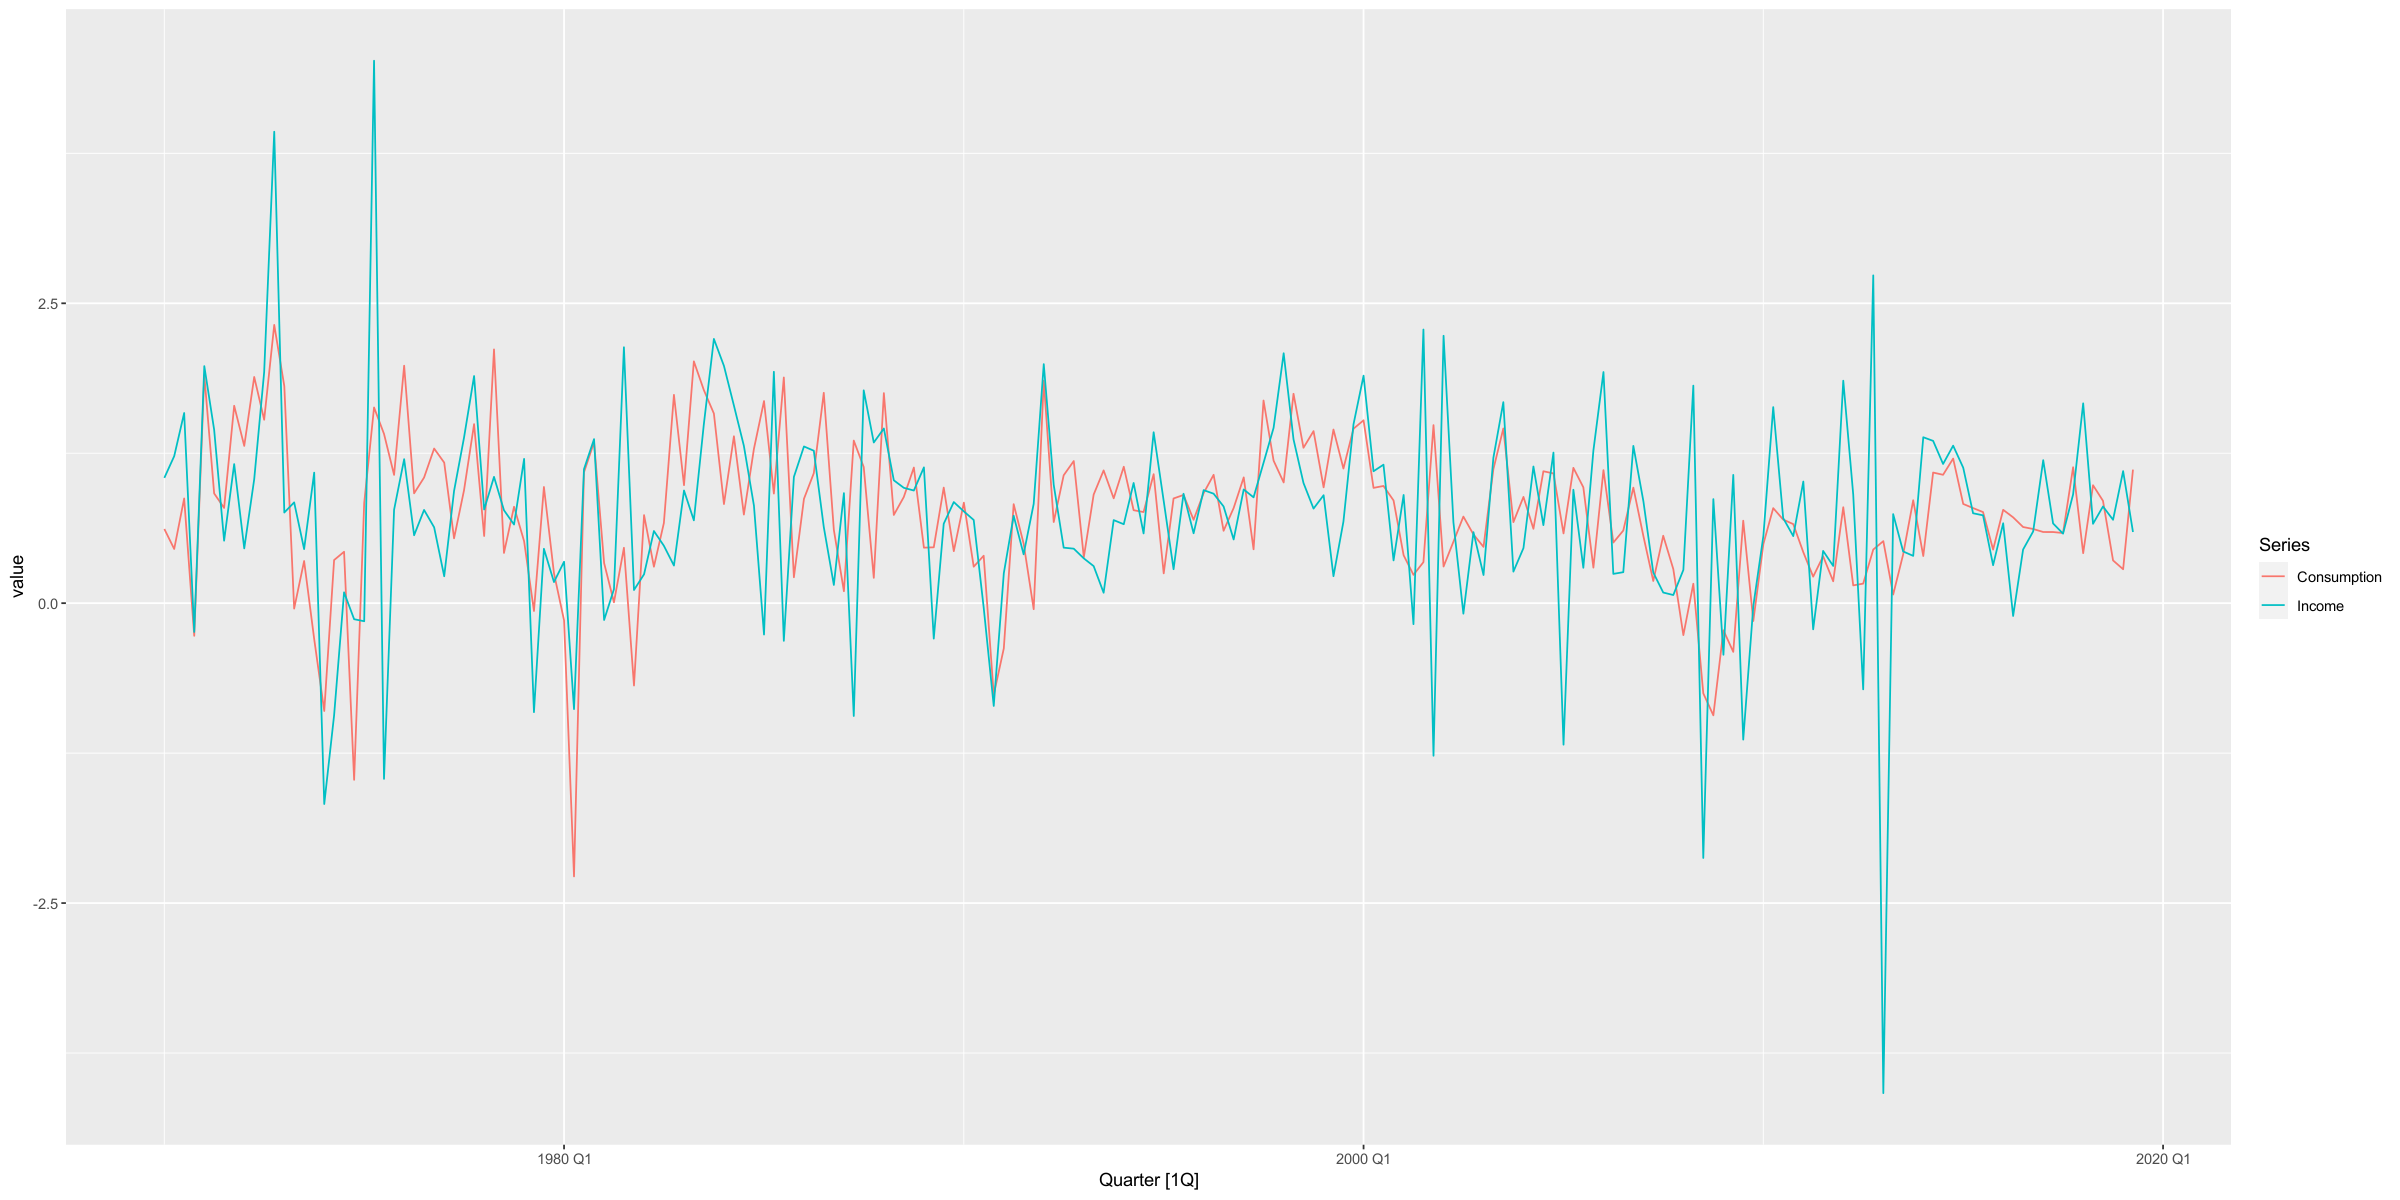

In [4]:
# Example: US consumption expenditure

# tiem series of quarterly percentage changes (growth rates) of real personal consumption expenditure, y and real personal disposable income, x for the US from 1970 Q1 to 2019 Q2


us_change |> pivot_longer(c(Consumption, Income), names_to = "Series") |> autoplot(value) |> labs(y = "% change")

`geom_smooth()` using formula = 'y ~ x'


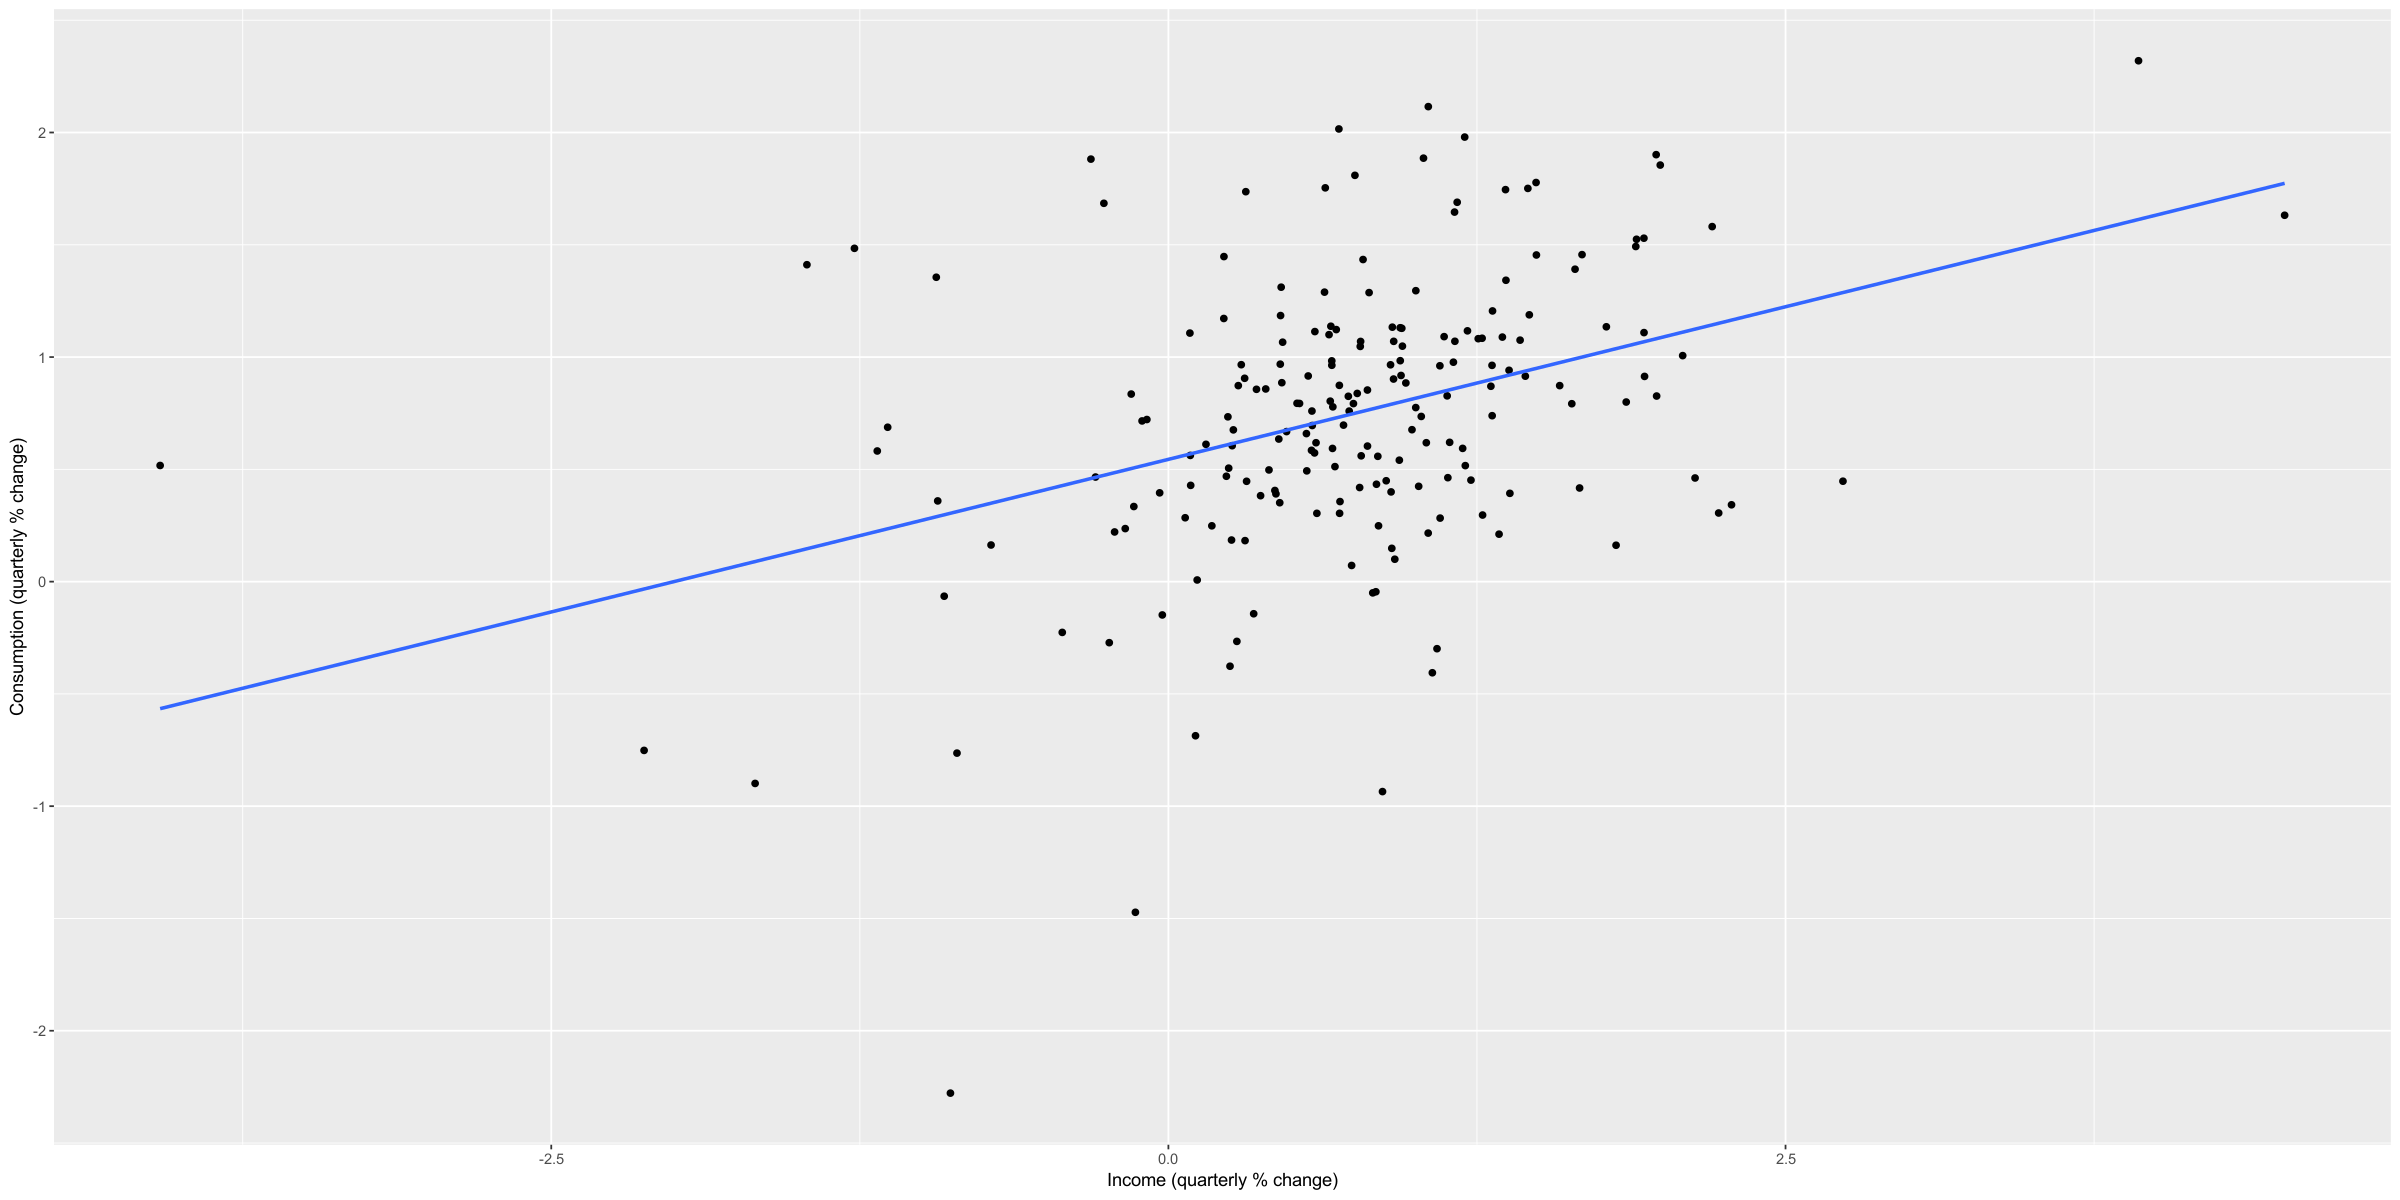

In [5]:
# A scatter plot of consumption changes against income changes is shown in the above figure along with the estimated regression line


us_change |> ggplot(aes(x = Income, y = Consumption)) + labs(y = "Consumption (quarterly % change)", x = "Income (quarterly % change)") + geom_point() + geom_smooth(method = "lm", se=FALSE)

In [6]:
# The equation is estimated using the TSLM() function:

us_change |> model(TSLM(Consumption ~ Income)) |> report()

Series: Consumption 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-2.58236 -0.27777  0.01862  0.32330  1.42229 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.54454    0.05403  10.079  < 2e-16 ***
Income       0.27183    0.04673   5.817  2.4e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5905 on 196 degrees of freedom
Multiple R-squared: 0.1472,	Adjusted R-squared: 0.1429
F-statistic: 33.84 on 1 and 196 DF, p-value: 2.4022e-08


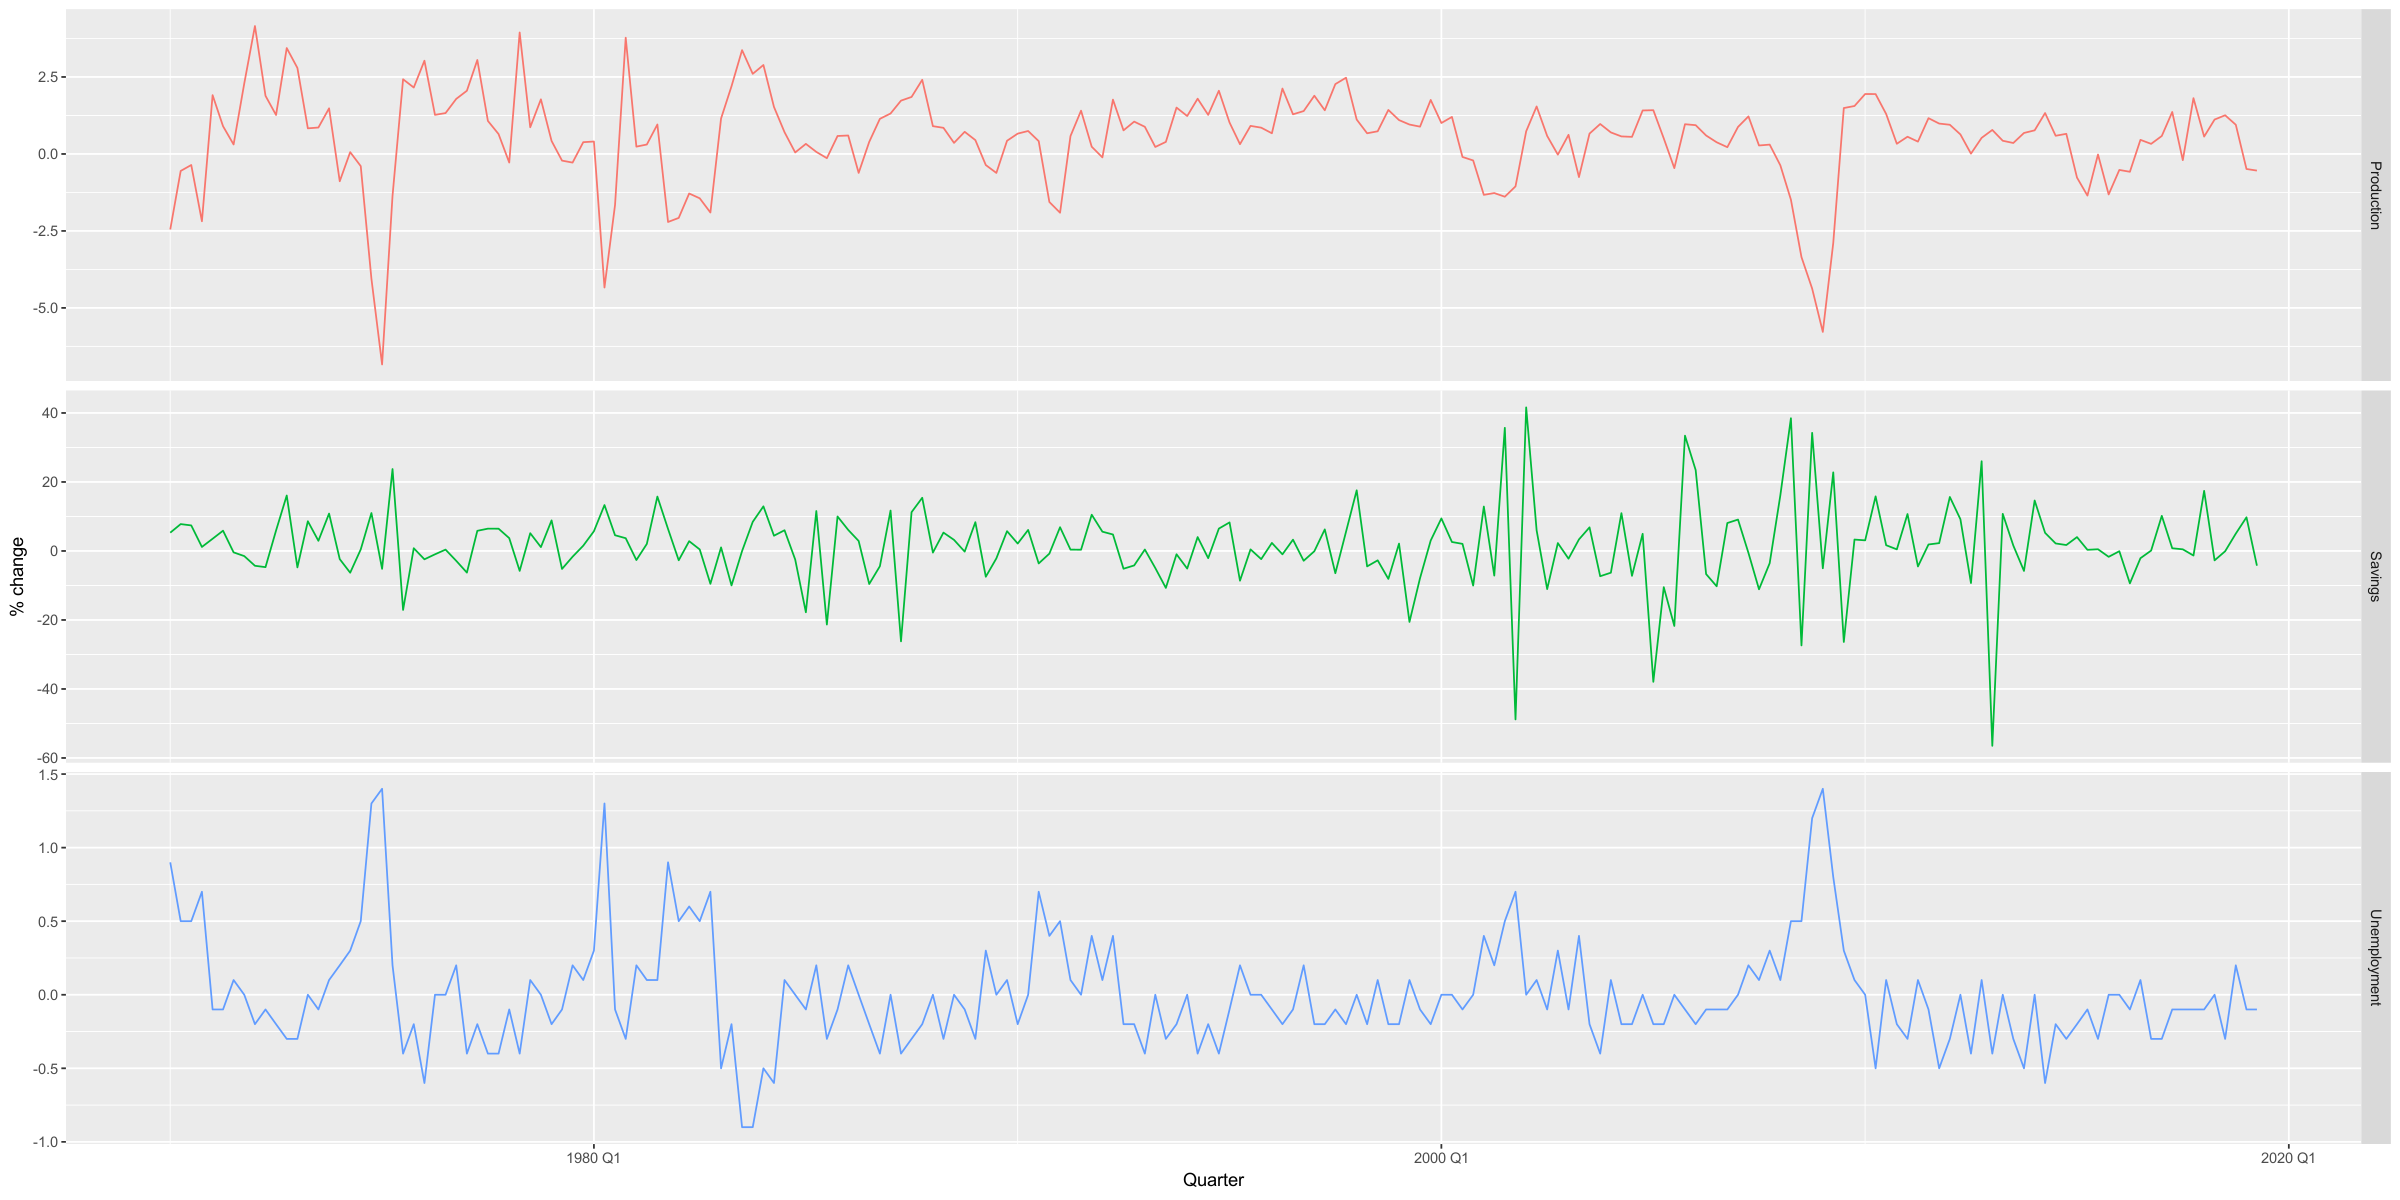

In [7]:
## Example: US consumption expenditure

## the following graph additional predictores that may be useful for forecasting US consumption expenditure. These are quarterly percentage changes in industrial production and personal savings, and quarterly changes in the unemployment rate. Building a multiple linear regression model can potentially generate mroe accurate forecasts as we expect consumption expenditure to not only depend on personal income but on other predictores as well

us_change |>
select(-Consumption, -Income) |>
pivot_longer(-Quarter)|>
ggplot(aes(Quarter, value, colour = name)) +
geom_line() +
facet_grid(name ~ ., scales = "free_y") +
guides(colour = "none") +
labs(y = "% change")

In [8]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



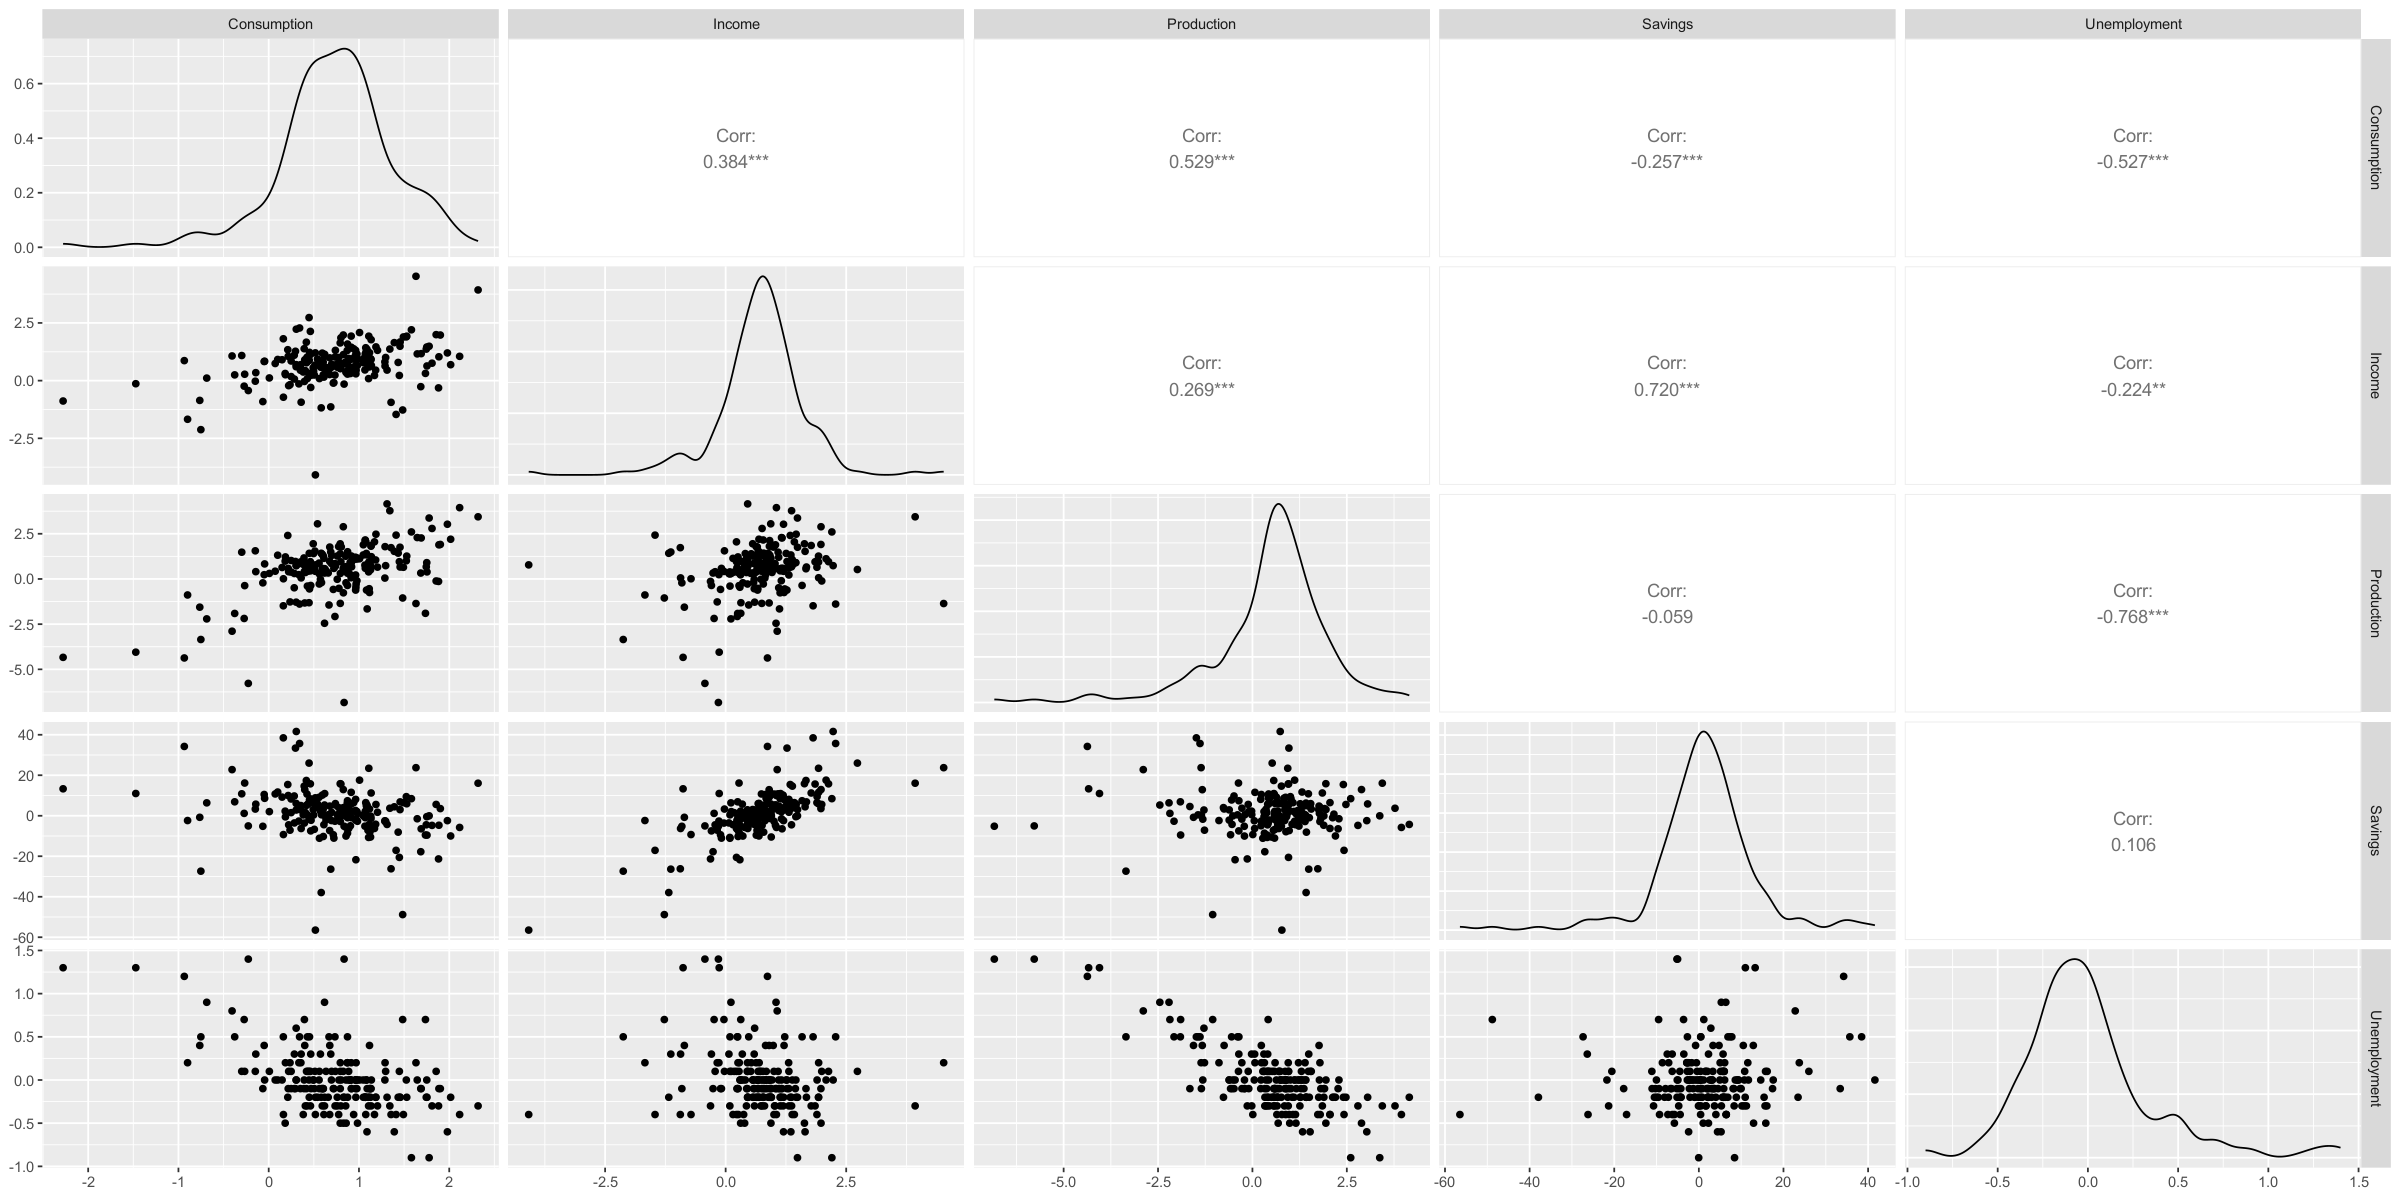

In [9]:
# The figure below is a scatterplot of five variables. The first column shows the relationships between the forecast variable and each of the predictors. The scatterplots show positive relationships with income and industrial production, and negative relatioships with savings and unemployment. The strength of these relatioships are shown by the ocrrelation coefficients across the first row. The remaining scatterplots and correlation coefficients show the relationships between the predictors


us_change |> GGally::ggpairs(columns = 2:6)

7.2 -- Least squares estimation

In [10]:
# Example: US comsumption expenditure

# Multiple linear regression


fit_consMR <- us_change|> model(tslm = TSLM(Consumption ~ Income + Production + Unemployment + Savings))

In [11]:
report(fit_consMR)

Series: Consumption 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90555 -0.15821 -0.03608  0.13618  1.15471 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.253105   0.034470   7.343 5.71e-12 ***
Income        0.740583   0.040115  18.461  < 2e-16 ***
Production    0.047173   0.023142   2.038   0.0429 *  
Unemployment -0.174685   0.095511  -1.829   0.0689 .  
Savings      -0.052890   0.002924 -18.088  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3102 on 193 degrees of freedom
Multiple R-squared: 0.7683,	Adjusted R-squared: 0.7635
F-statistic:   160 on 4 and 193 DF, p-value: < 2.22e-16


In [12]:
fit_consMR

tslm
<model>
<TSLM>


In [13]:
# Prediction s of y can be obtained by using the esdtimated coefficie4nts in the regresision equation and setting the errror terem to zero.

In [14]:
# The following plots show the actual values compared to the fitted values for the percentage change in the US consumption expenditure series. The time plot in the following shows that the fitted values follow the actual data failry closely.

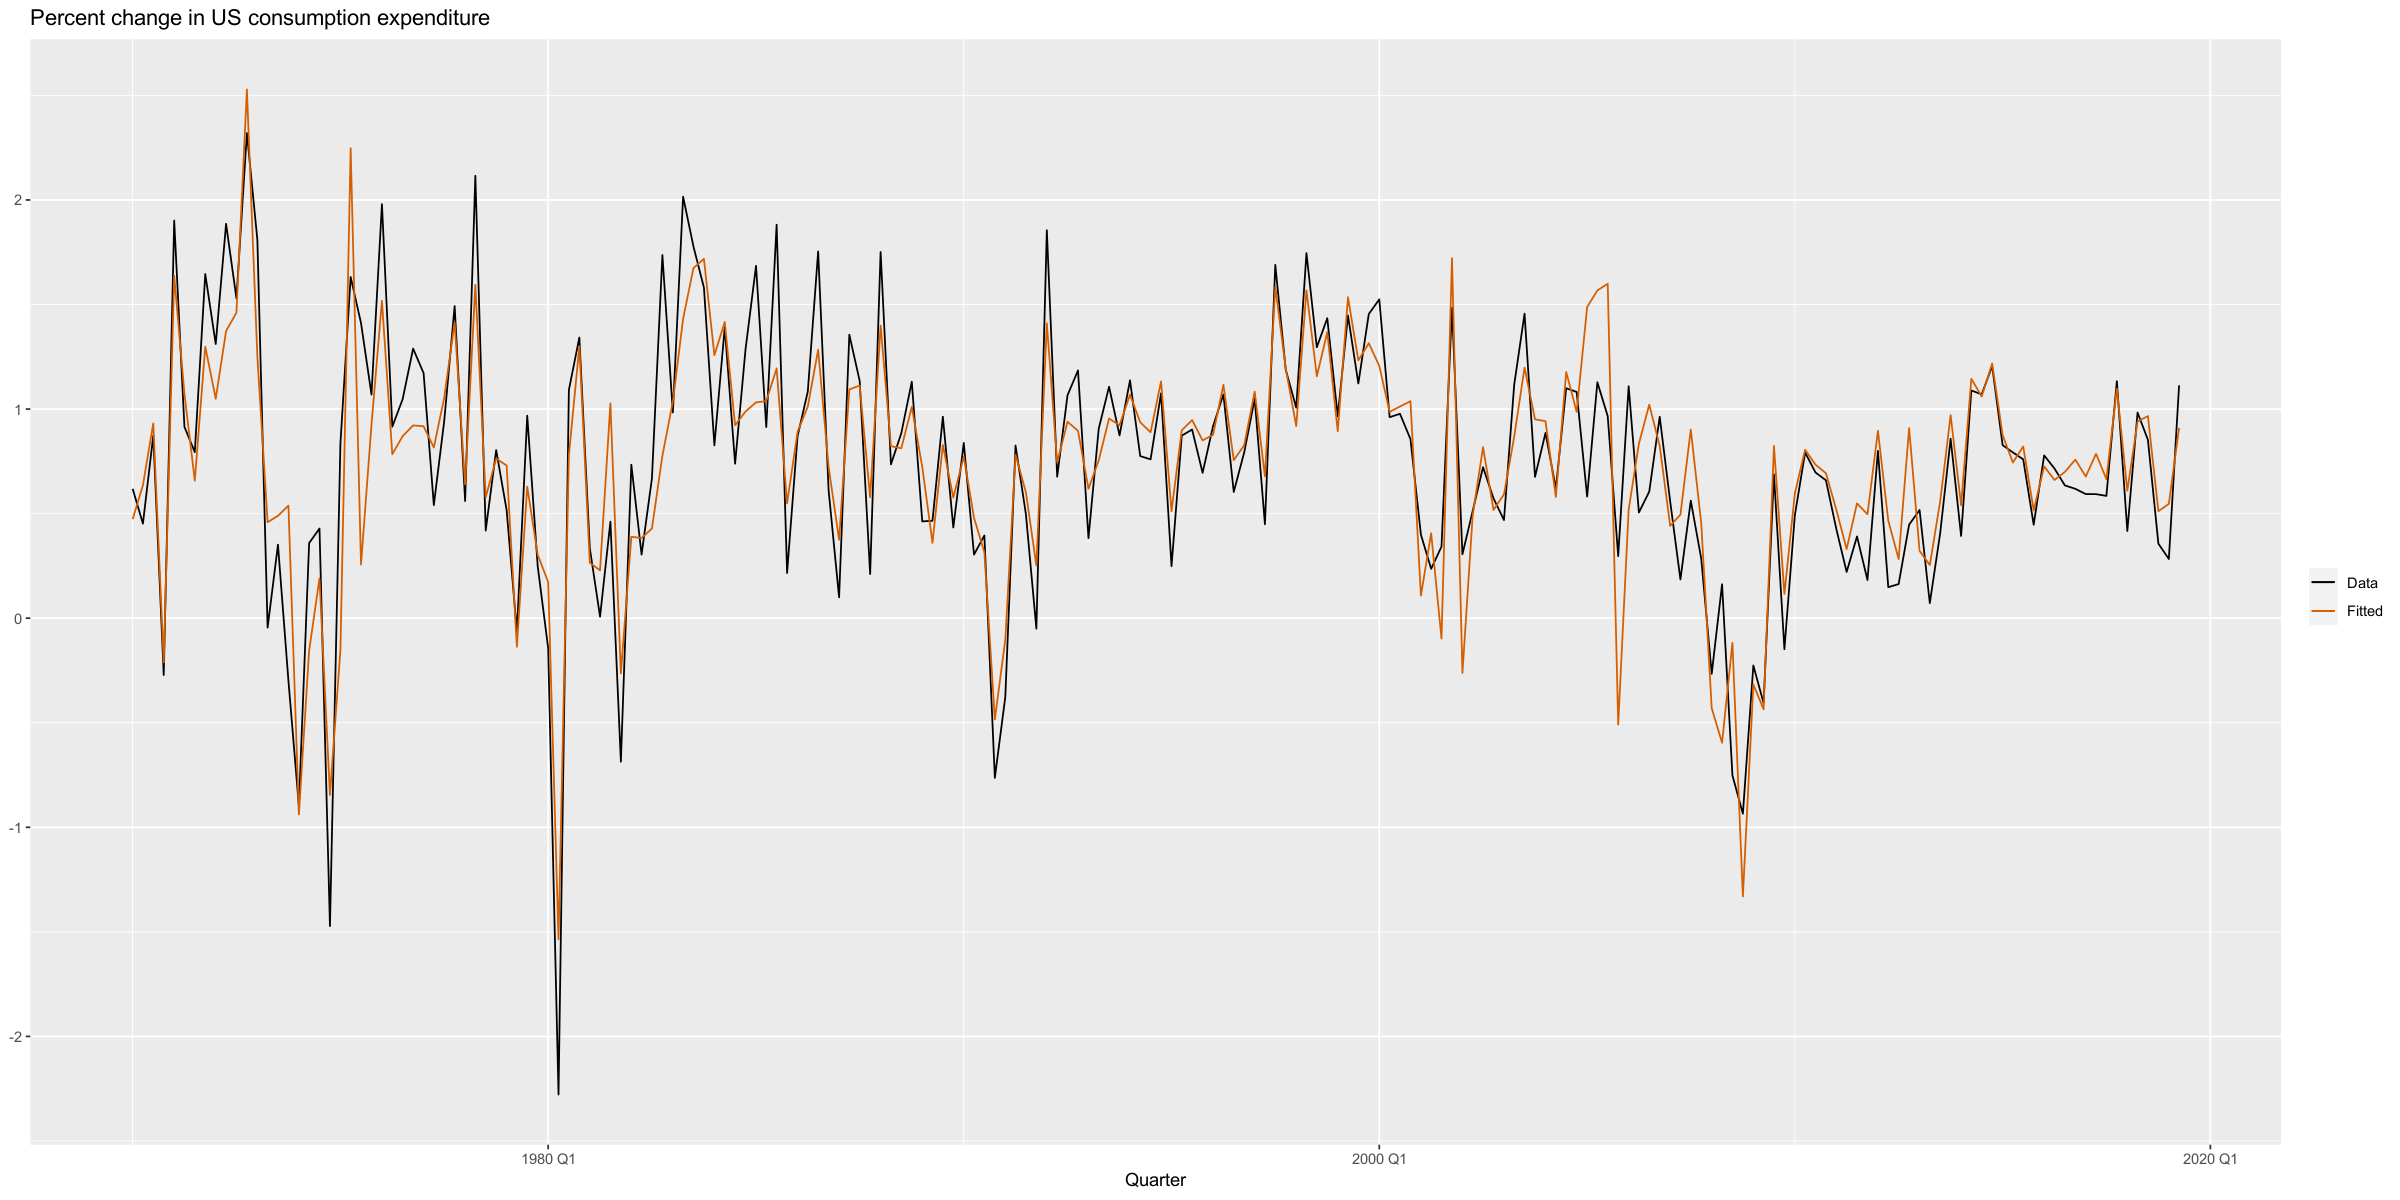

In [15]:
# The following plots show the actual values compared to the fitted values for the percentage change in the US consumption expenditure series. The time plot shows that the fitted values follow the actual data fairly closely. This is verified by the strong positive relationship shown by the scatterplot

augment(fit_consMR)|>
ggplot(aes(x = Quarter)) +
geom_line(aes(y = Consumption, colour = "Data"))+
geom_line(aes(y = .fitted, colour = "Fitted"))+
labs(y = NULL, title = "Percent change in US consumption expenditure")+
scale_colour_manual(values = c(Data = "black", Fitted = "#D55E00"))+
guides(colour = guide_legend(title = NULL))

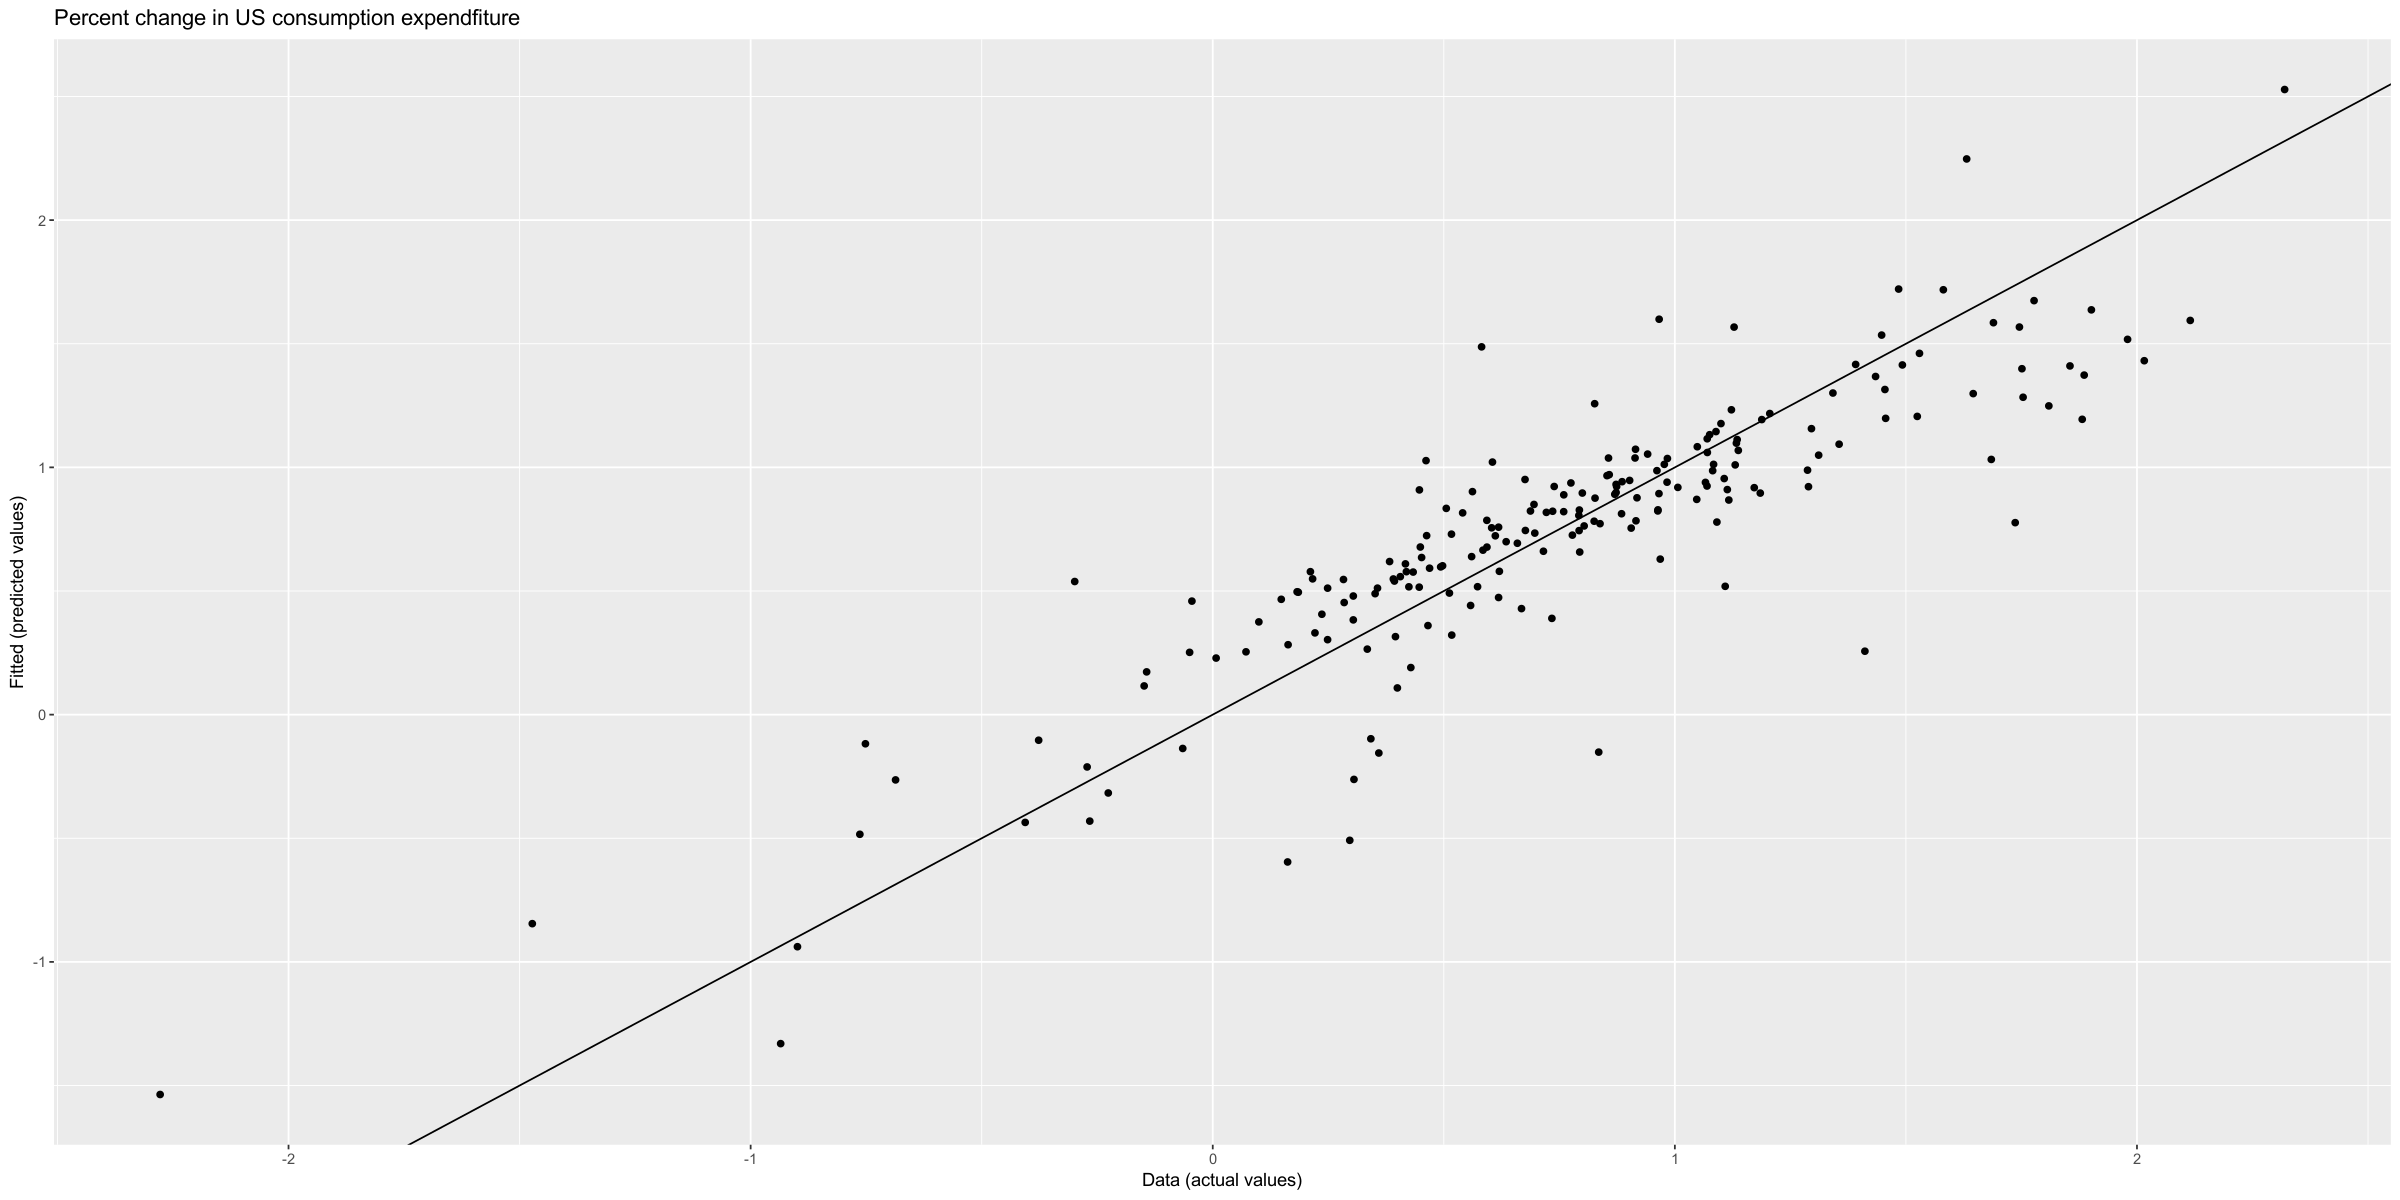

In [16]:
augment(fit_consMR)|>
ggplot(aes(x = Consumption, y = .fitted)) +
geom_point() +
labs(
    y = "Fitted (predicted values)",
    x = "Data (actual values)",
    title = "Percent change in US consumption expendfiture"
) +
geom_abline(intercept = 0, slope = 1)

In [17]:
 # A common way to summarise how well a  linear regressison model fitst the data is via the coefficient of determination , or Rsquared. This can be calculated as the square of the correlation between the observed y values and the predicted y values

 # It reflects the proportion of variation in the forecast variable that is accounted for by the regression model.


 # These are the tests to check the fitness of the model
 

7.3 - -- Evaluating the regression model

In [18]:
# While plotting the ACF of the residuals if there is any significant spike in the lags, then we must assume that there is some information left in the time series data

# Histogram of residuals

# It is always a good idea to check whether the residuals are normally distributed.

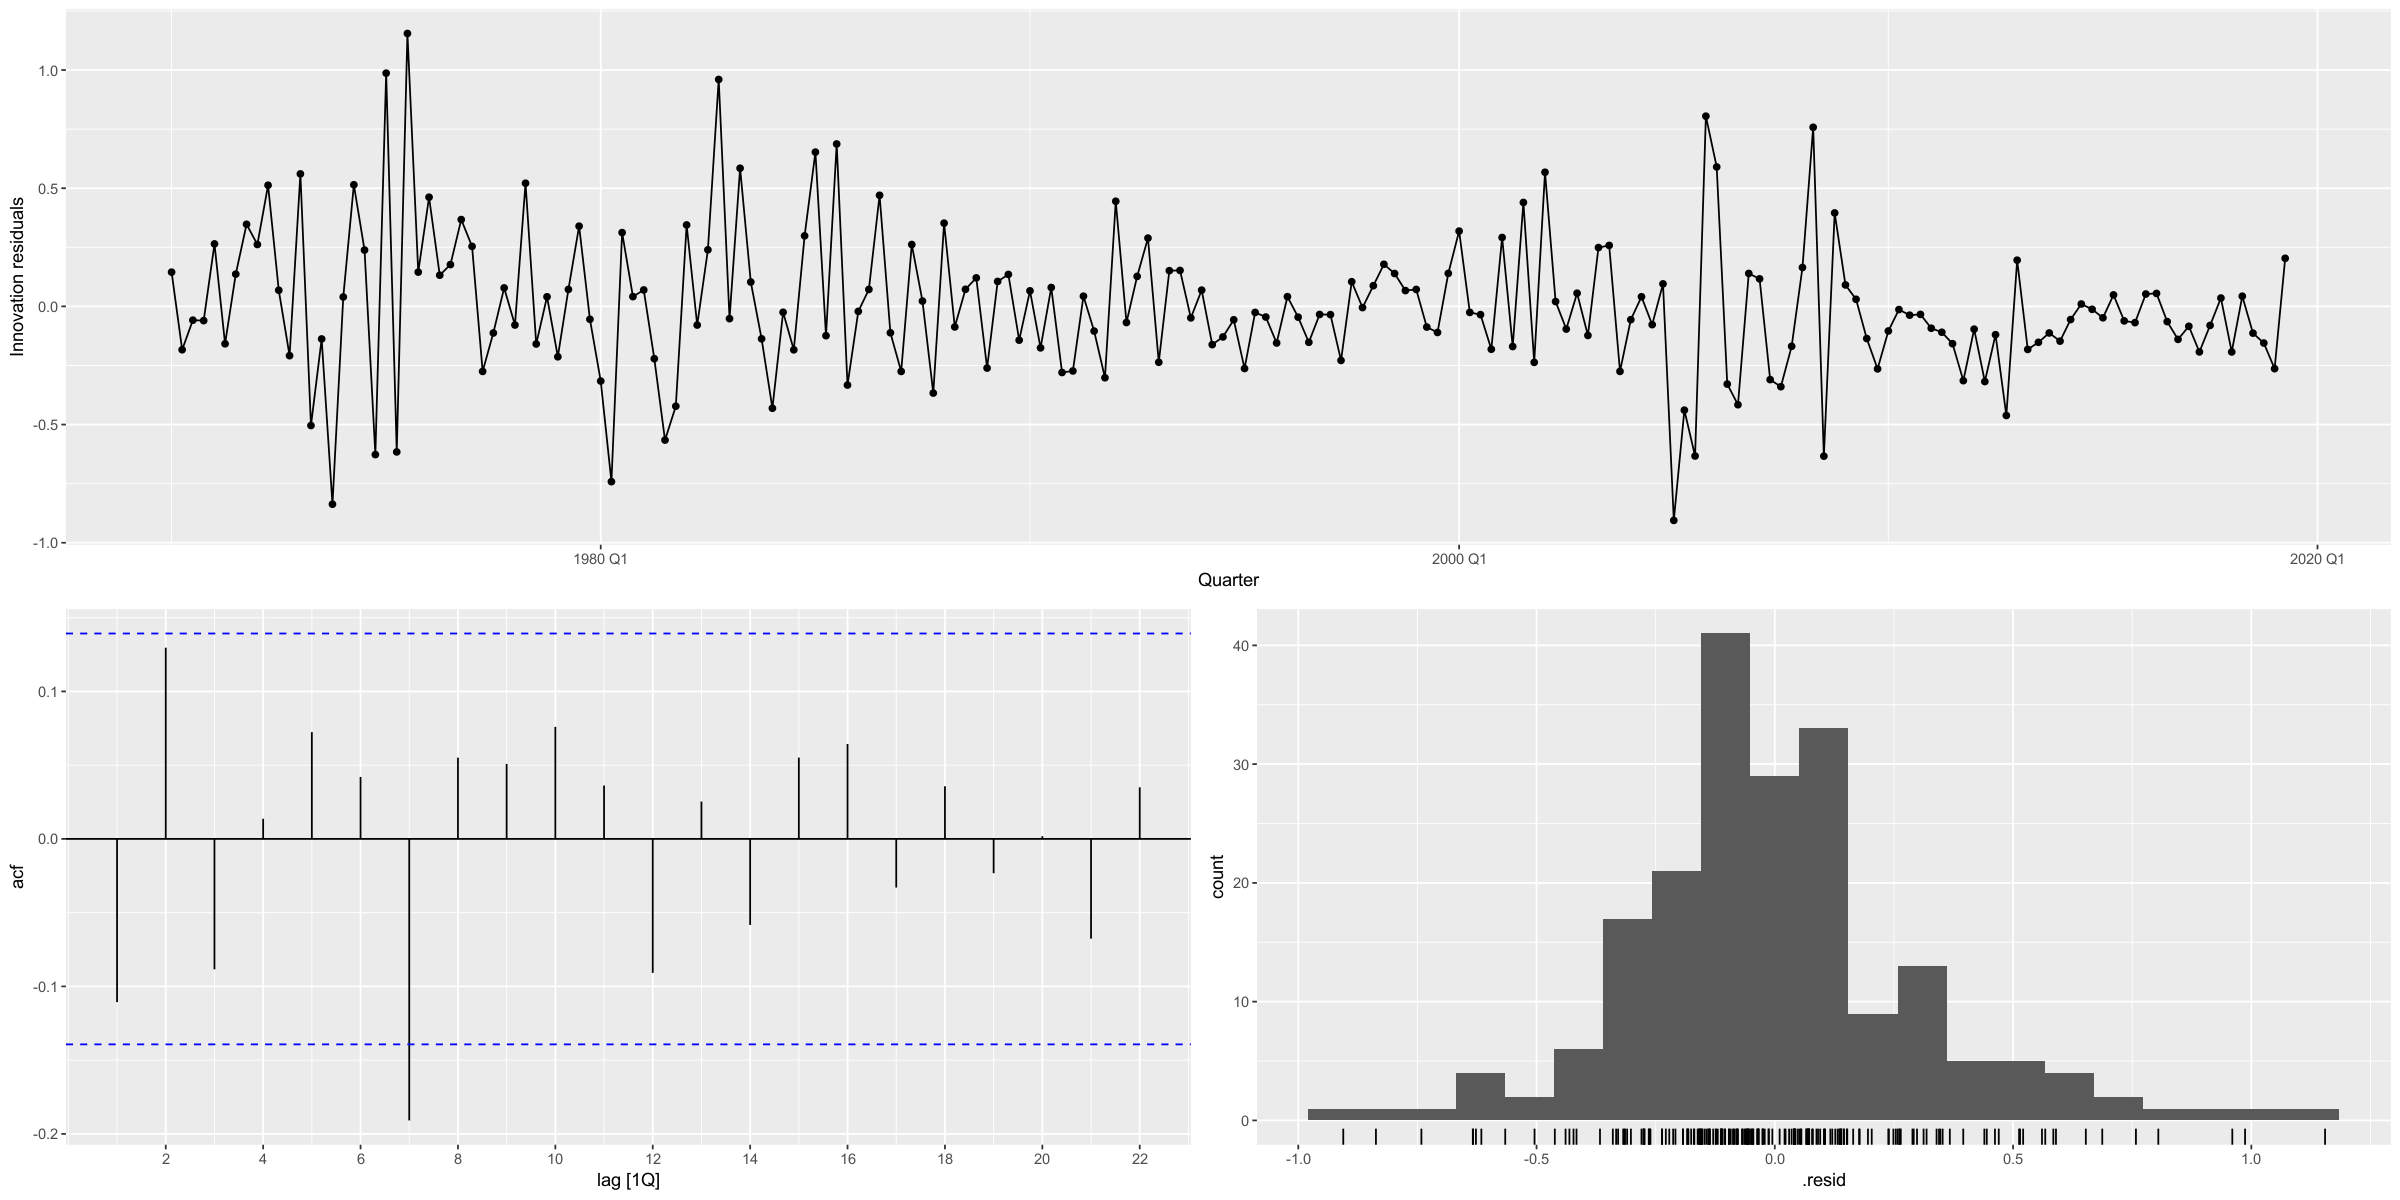

In [19]:
fit_consMR |> gg_tsresiduals()

# The 7th lag has significant autocorrelation

In [20]:
augment(fit_consMR) |> features(.innov, ljung_box, lag = 10)

.model,lb_stat,lb_pvalue
<chr>,<dbl>,<dbl>
tslm,18.86532,0.04200702


Residaul plots against predictors


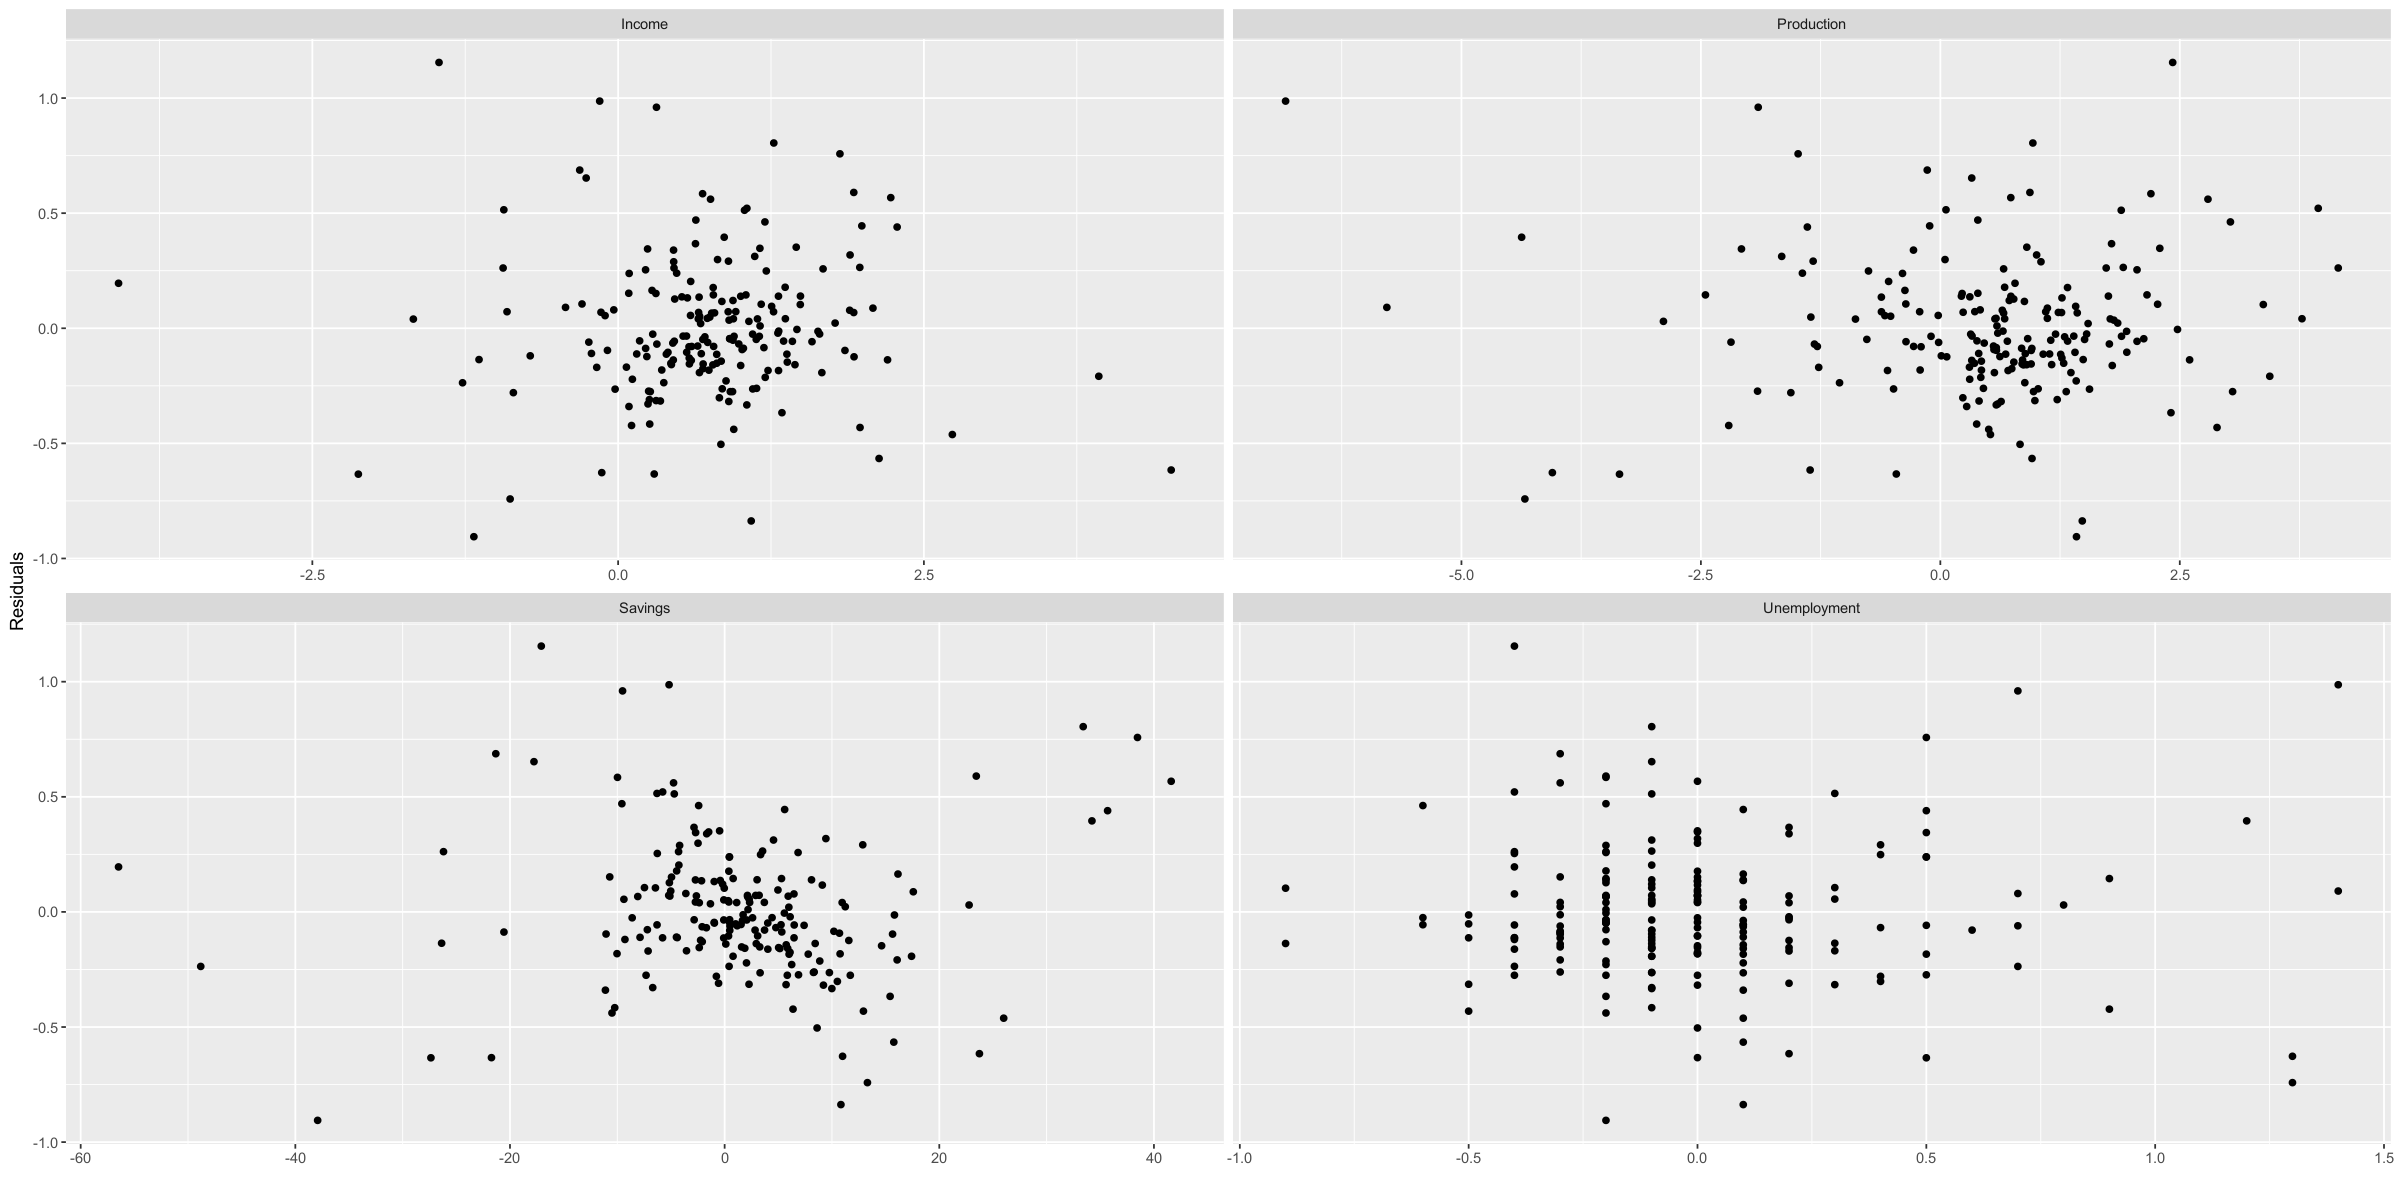

In [21]:
# Simple scatter plot would check for patters in the residuals

us_change |> left_join(residuals(fit_consMR), by = "Quarter") |>
pivot_longer(Income:Unemployment, names_to = "regressor", values_to = "x") |>
ggplot(aes(x = x, y = .resid)) +
geom_point() +
facet_wrap(. ~ regressor, scales = "free_x") +
labs(y = "Residuals", x = "")

Residual plots against fitted values

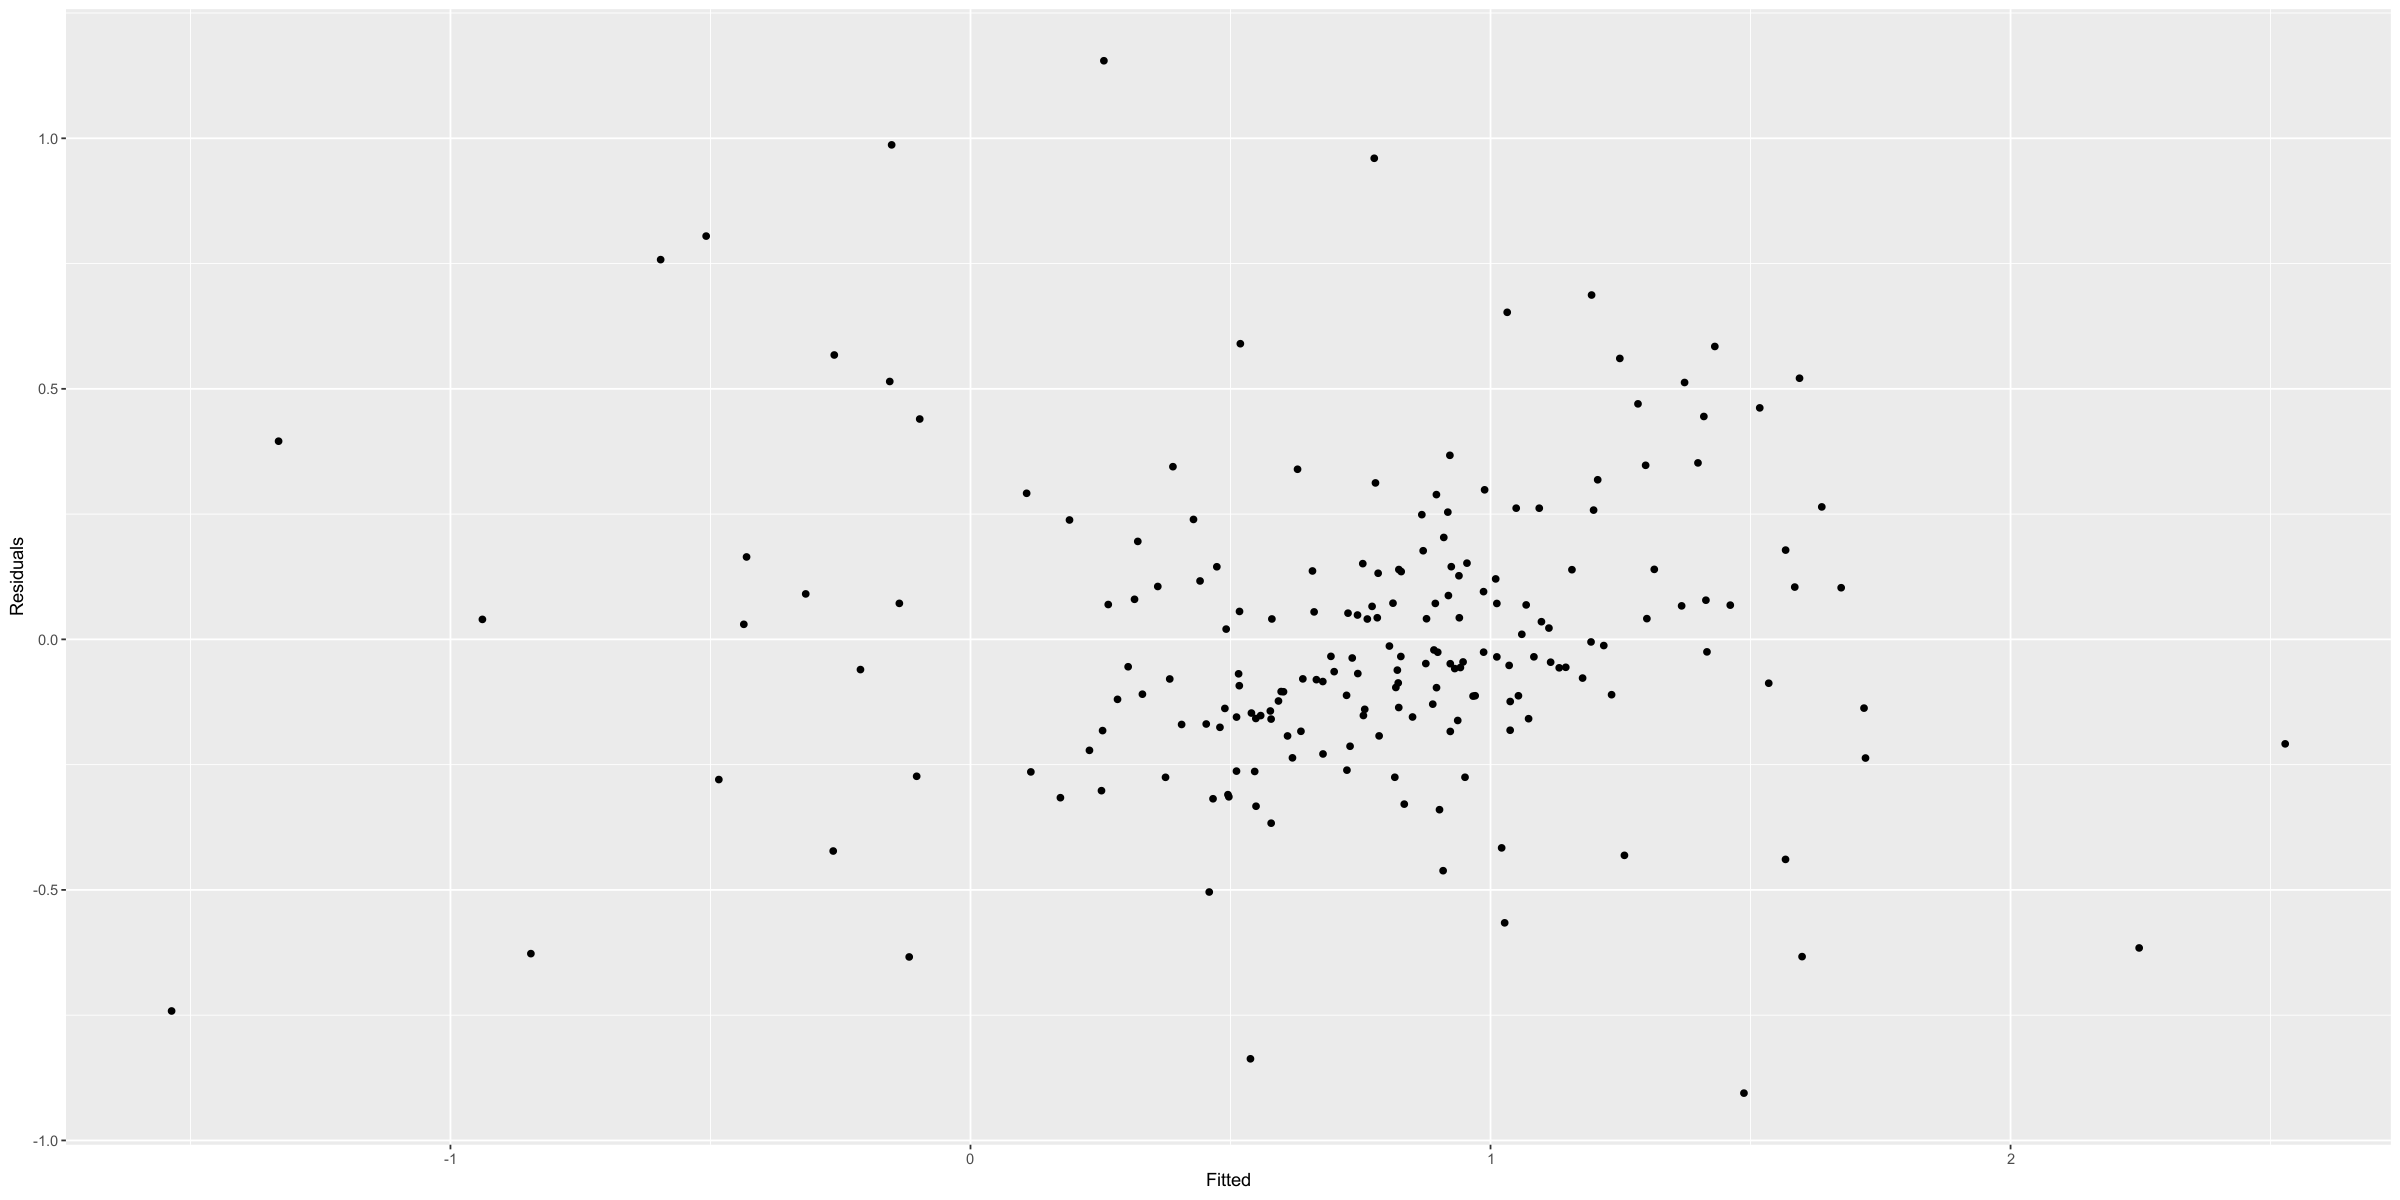

In [22]:
augment(fit_consMR) |>
ggplot(aes(x = .fitted, y = .resid)) +
geom_point() + labs(x = "Fitted", y = "Residuals")

In [23]:
# Spurious regression
# No reason for one trend to complement another, yet they are highly correlated

fit <- aus_airpassengers|> filter(Year <= 2011) |> left_join(guinea_rice, by="Year") |> model(TSLM(Passengers ~ Production))
report(fit)


# As from the R^2 values one can easily assume that the regression explains 95% of the variance

Series: Passengers 
Model: TSLM 

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9448 -1.8917 -0.3272  1.8620 10.4210 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -7.493      1.203  -6.229 2.25e-07 ***
Production    40.288      1.337  30.135  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.239 on 40 degrees of freedom
Multiple R-squared: 0.9578,	Adjusted R-squared: 0.9568
F-statistic: 908.1 on 1 and 40 DF, p-value: < 2.22e-16


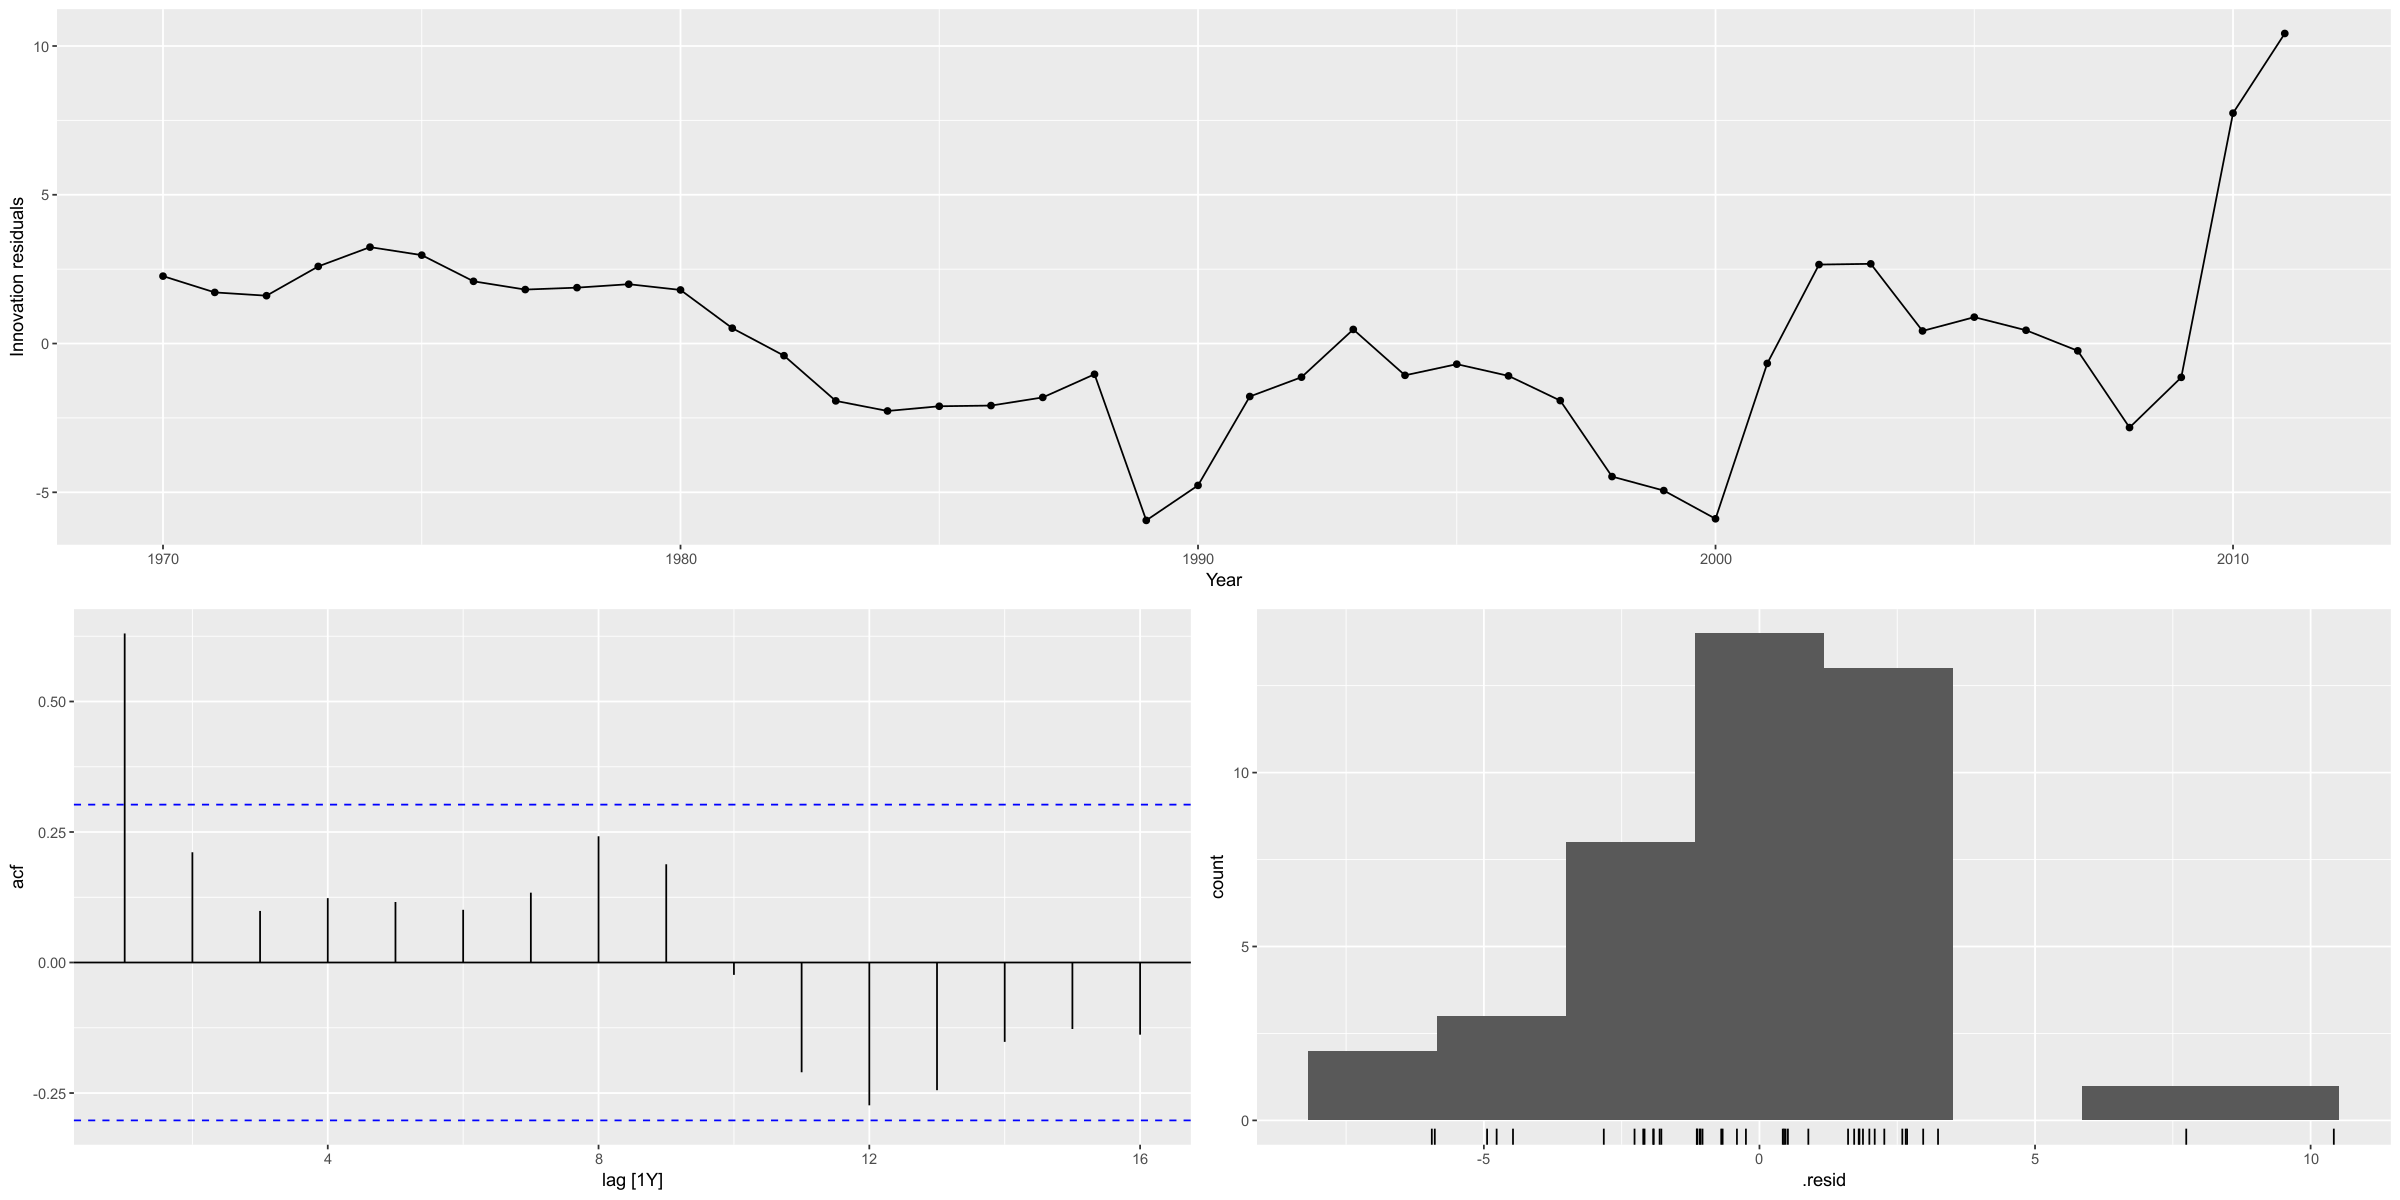

In [24]:
fit|>gg_tsresiduals()

7.4 --  Some useful predictors

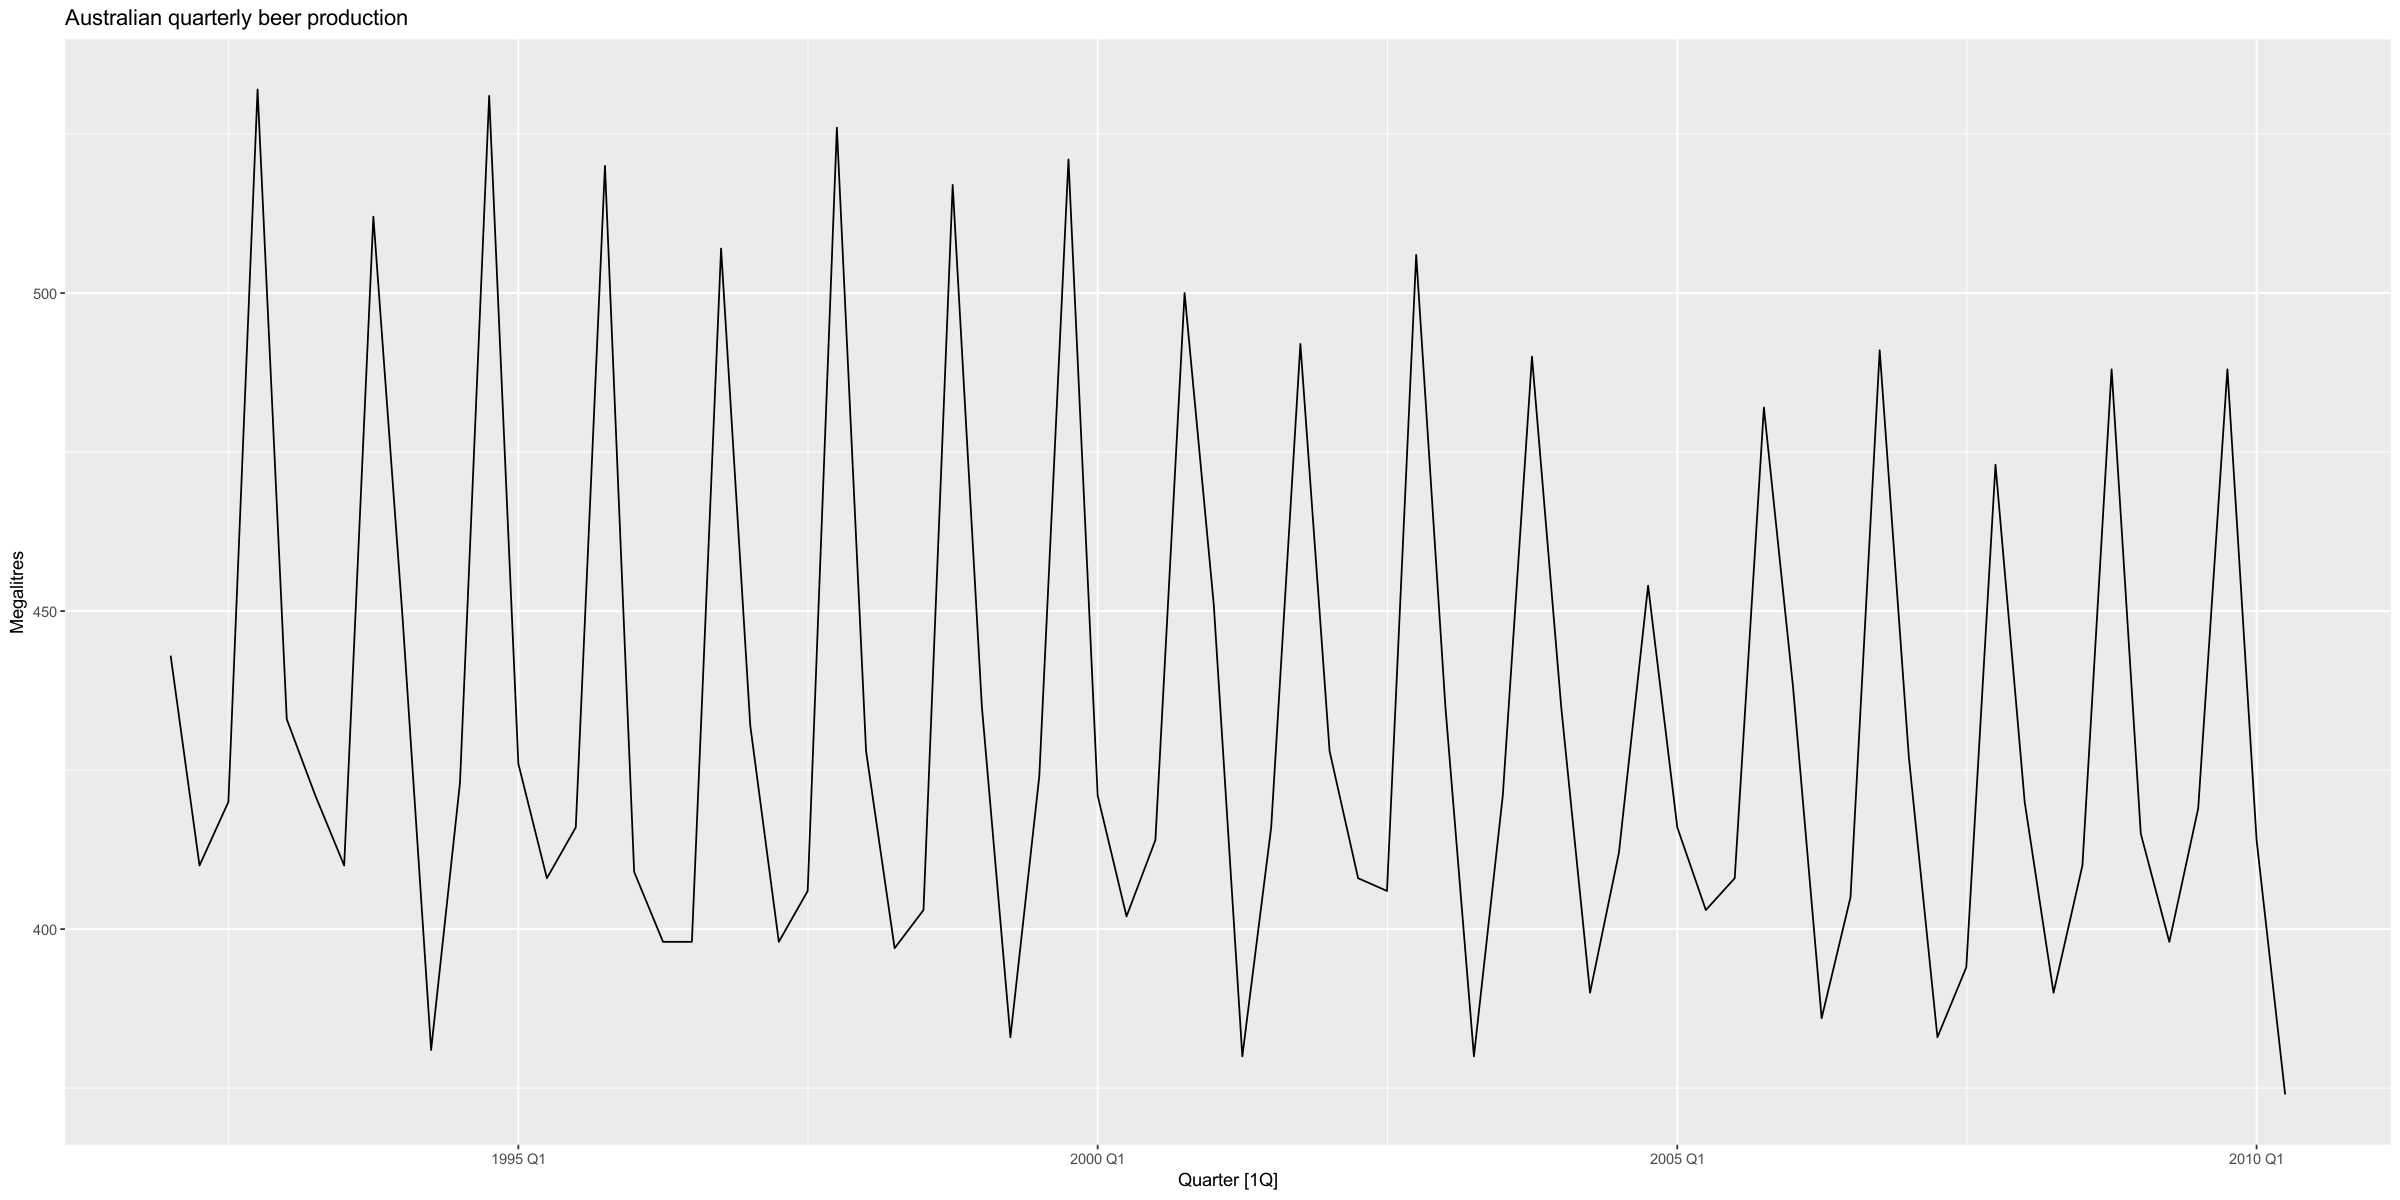

In [25]:
# Seasonal Dummy variables


 recent_production <- aus_production|>filter(year(Quarter) >= 1992) 
 recent_production|>autoplot(Beer) + labs(y = "Megalitres", title = "Australian quarterly beer production")

In [26]:
head(recent_production)

Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas
<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1992 Q1,443,5777,383,1289,38332,117
1992 Q2,410,5853,404,1501,39774,151
1992 Q3,420,6416,446,1539,42246,175
1992 Q4,532,5825,420,1568,38498,129
1993 Q1,433,5724,394,1450,39460,116
1993 Q2,421,6036,462,1668,41356,149


In [27]:

# 

fit_beer <- recent_production |> model(TSLM(Beer ~ trend() + season()))
#report(fit_beer)

In [28]:
report(fit_beer)

Series: Beer 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-42.9029  -7.5995  -0.4594   7.9908  21.7895 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   441.80044    3.73353 118.333  < 2e-16 ***
trend()        -0.34027    0.06657  -5.111 2.73e-06 ***
season()year2 -34.65973    3.96832  -8.734 9.10e-13 ***
season()year3 -17.82164    4.02249  -4.430 3.45e-05 ***
season()year4  72.79641    4.02305  18.095  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.23 on 69 degrees of freedom
Multiple R-squared: 0.9243,	Adjusted R-squared: 0.9199
F-statistic: 210.7 on 4 and 69 DF, p-value: < 2.22e-16


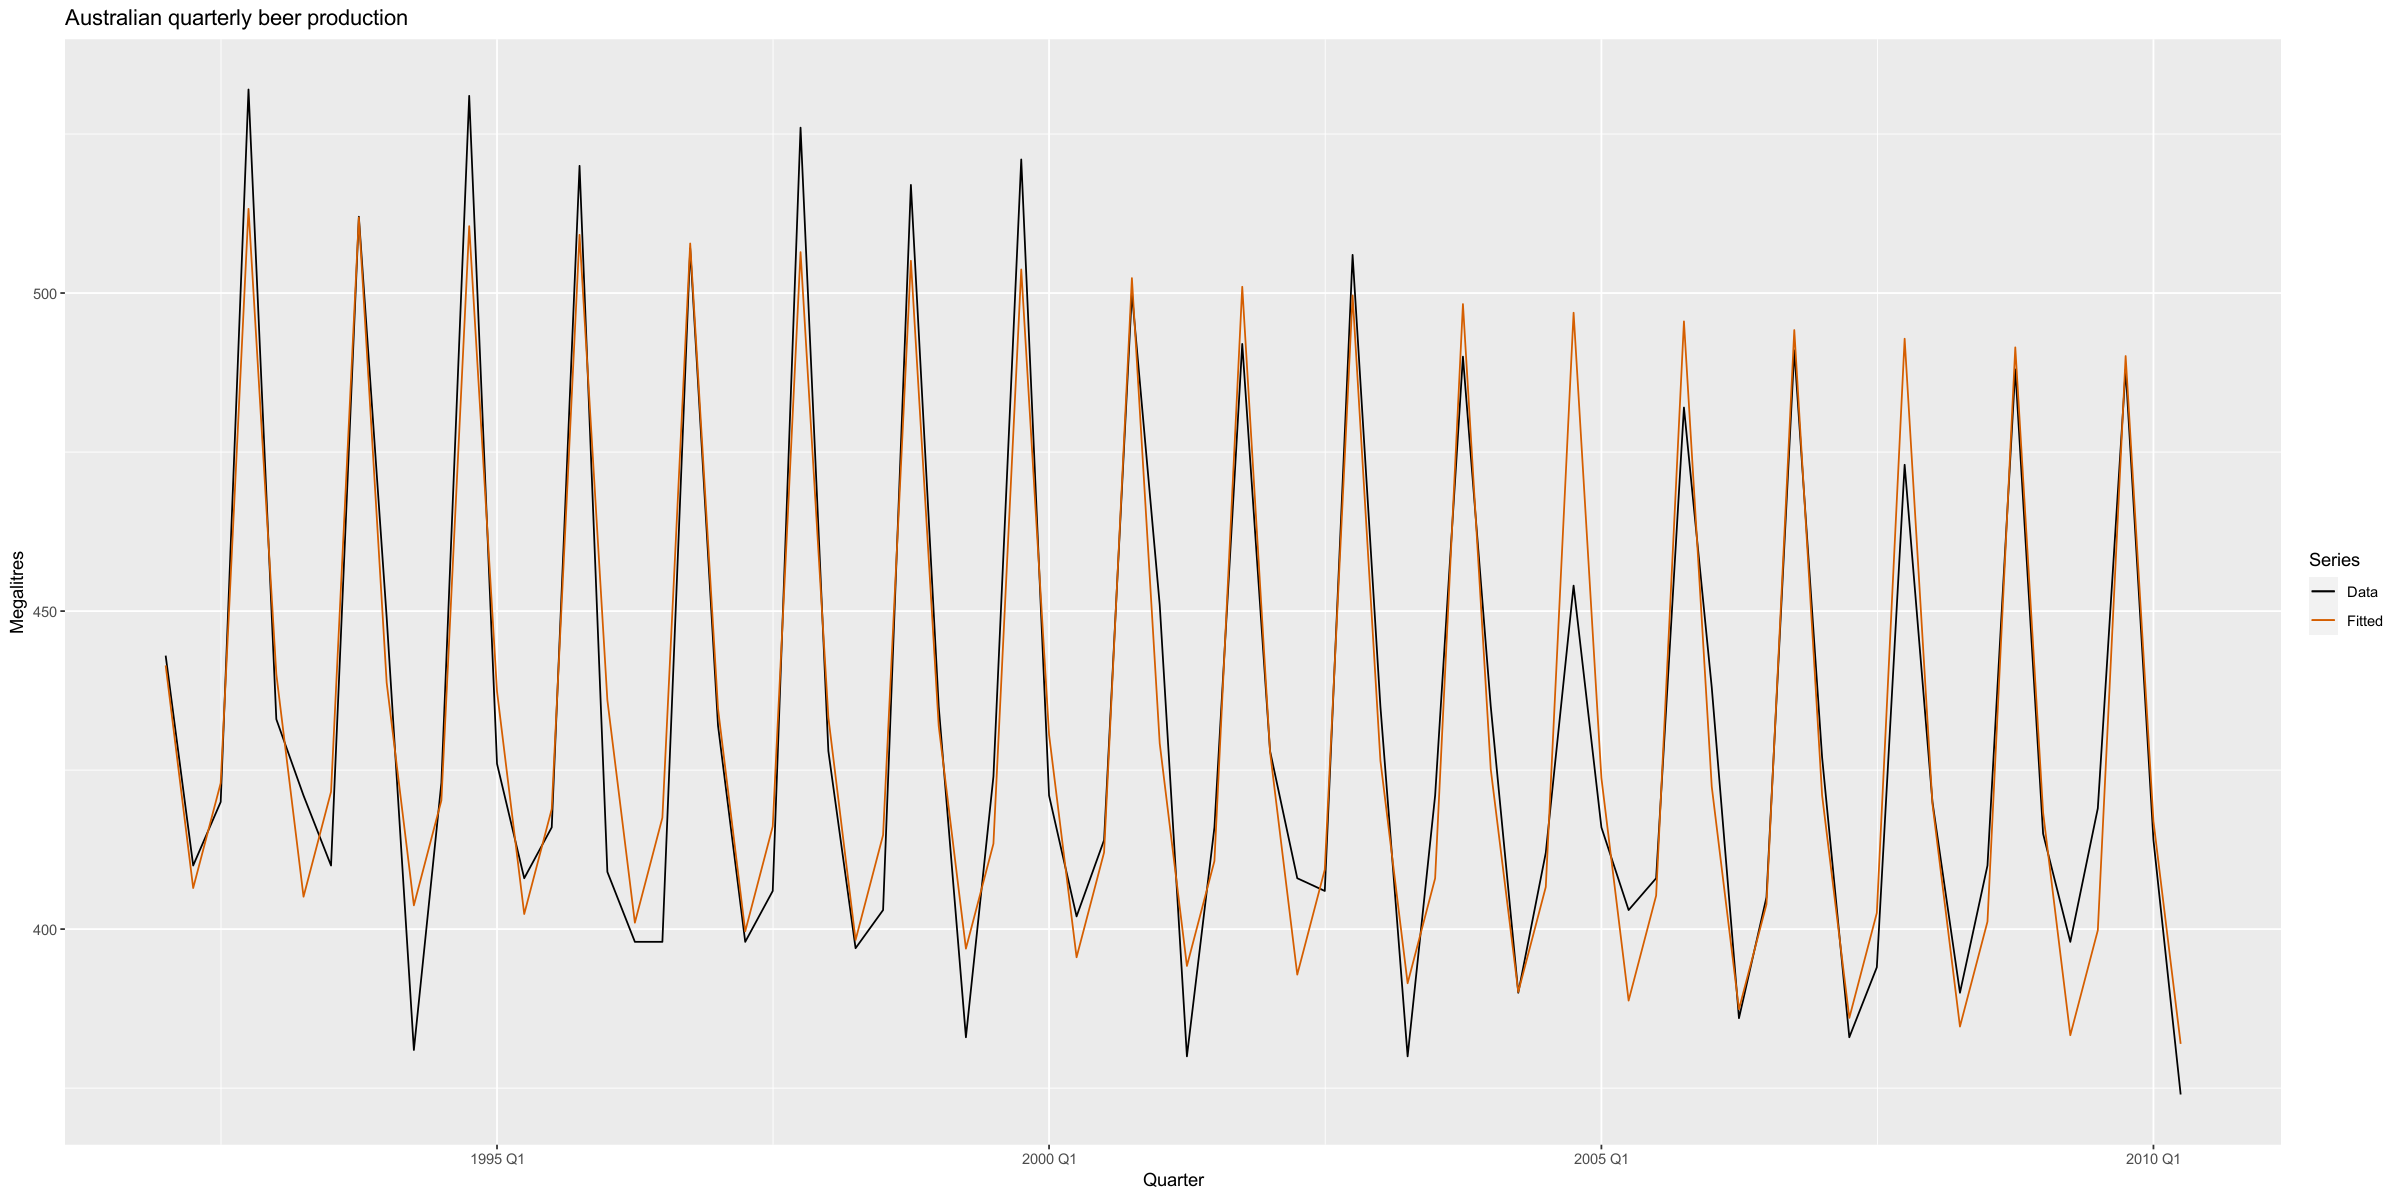

In [29]:
# plot the above interpretation

augment(fit_beer)|>
ggplot(aes(x = Quarter)) +
geom_line(aes(y = Beer, colour = "Data")) +
geom_line(aes(y = .fitted, colour = "Fitted")) +
scale_colour_manual(
    values = c(Data = "black", Fitted  = "#D55E00")
) +
labs(y = "Megalitres", title = "Australian quarterly beer production") +
guides(colour = guide_legend(title = "Series"))

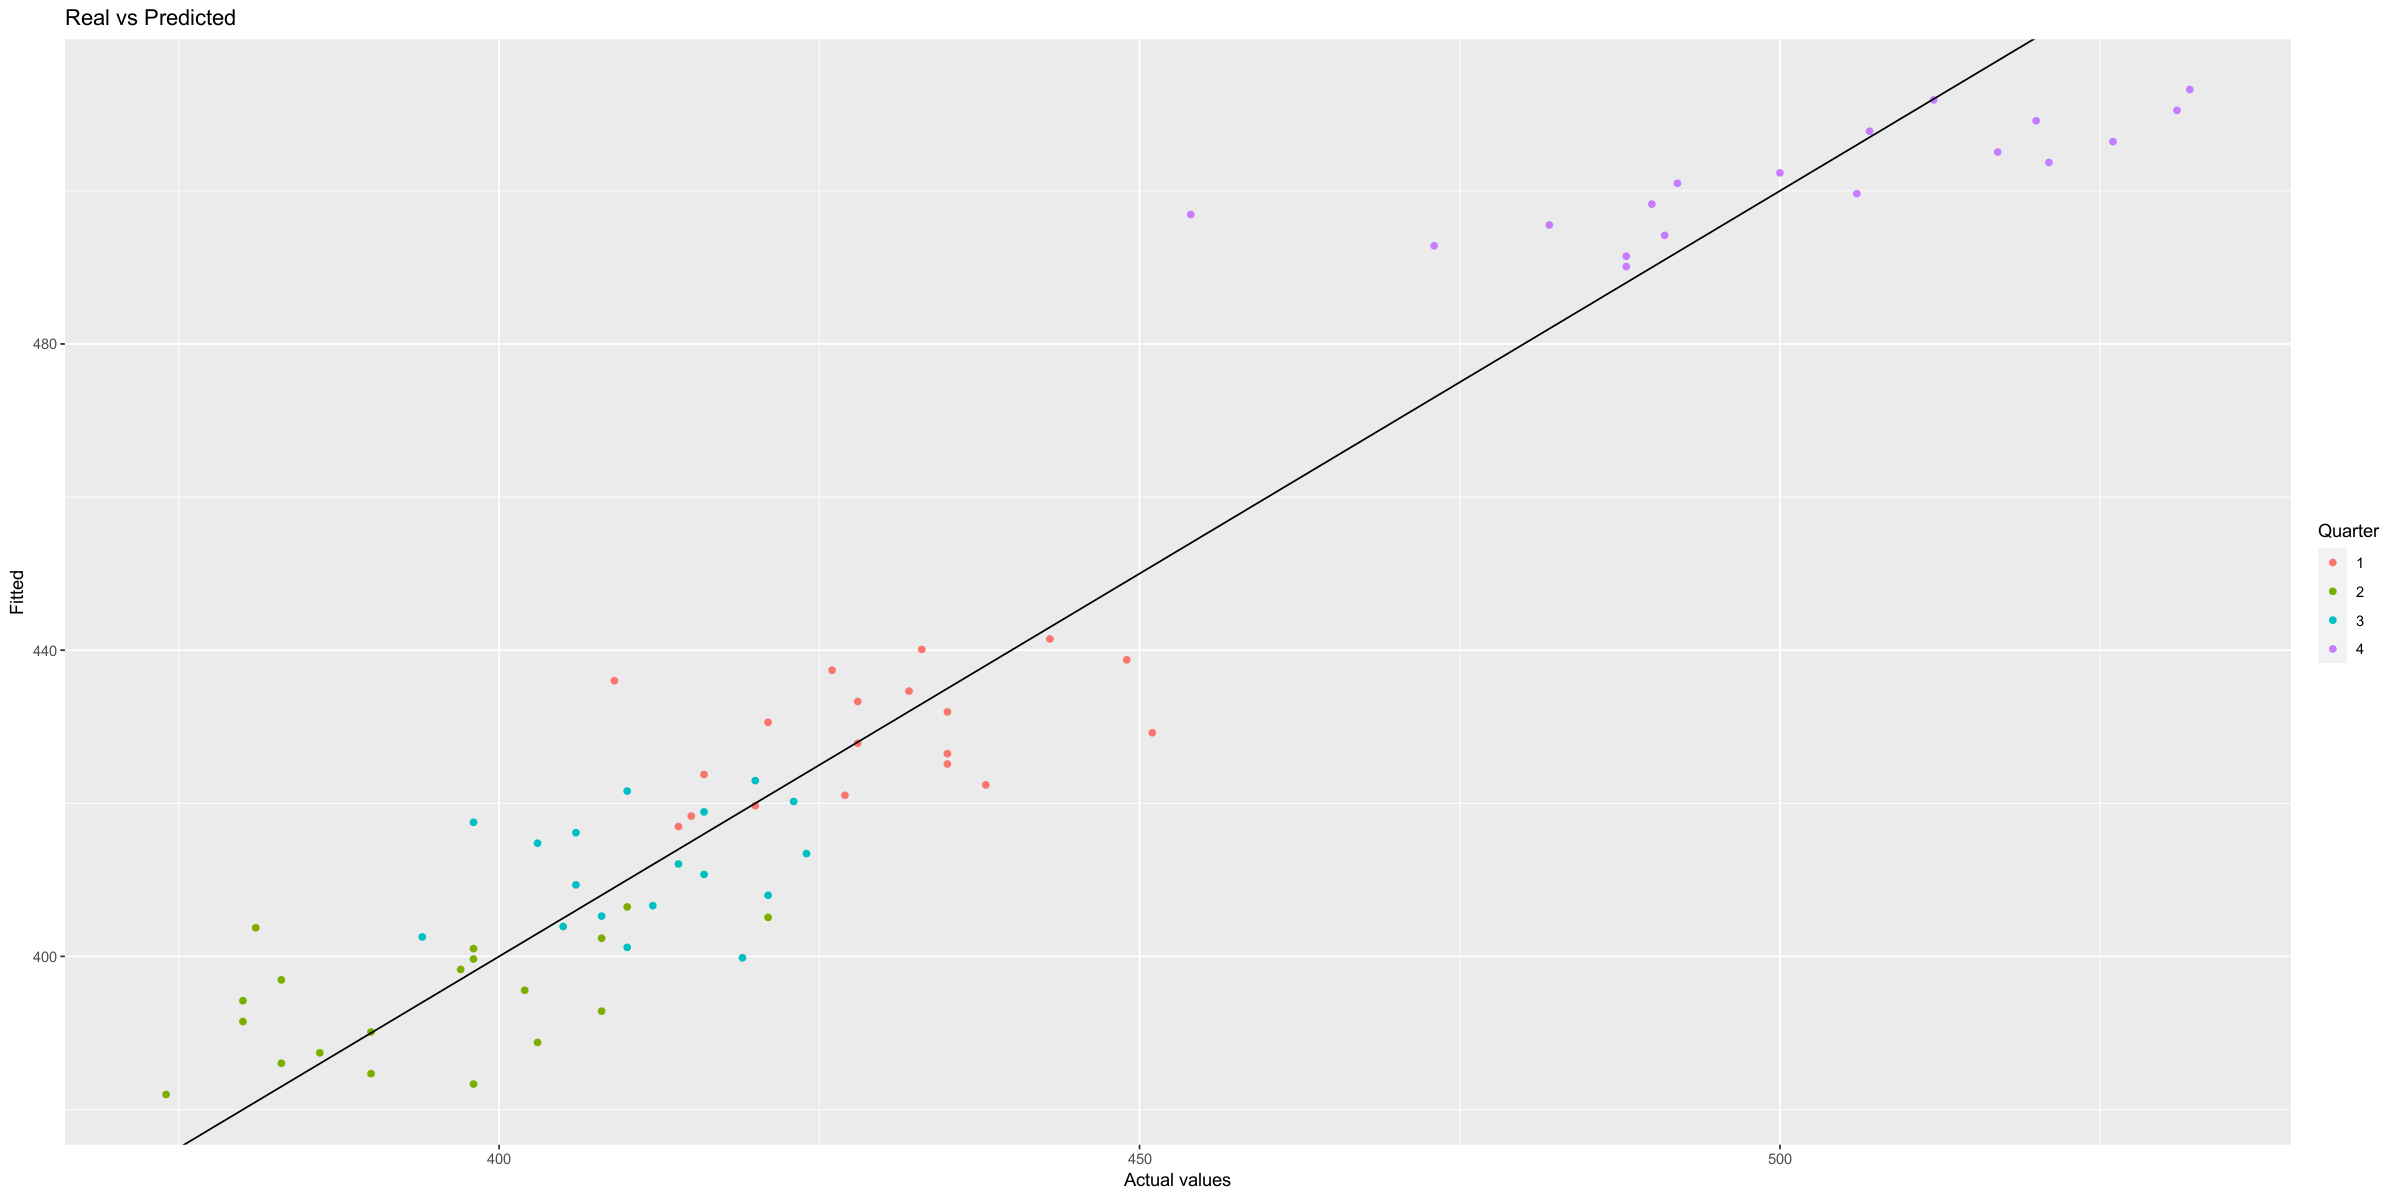

In [30]:
# plot the real data vs the predicted data

augment(fit_beer) |> ggplot(aes(x = Beer, y = .fitted, colour = factor(quarter(Quarter)))) +
geom_point() +
labs(y = "Fitted", x = "Actual values", title = "Real vs Predicted") +
geom_abline(intercept = 0, slope = 1) +
guides(colour = guide_legend(title = "Quarter"))

In [31]:
# An alternative to using dummy variables is to use fourier series

fourier_beer <- recent_production |> model(TSLM(Beer~trend() + fourier(K = 2)))
report(fourier_beer)

Series: Beer 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-42.9029  -7.5995  -0.4594   7.9908  21.7895 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        446.87920    2.87321 155.533  < 2e-16 ***
trend()             -0.34027    0.06657  -5.111 2.73e-06 ***
fourier(K = 2)C1_4   8.91082    2.01125   4.430 3.45e-05 ***
fourier(K = 2)S1_4 -53.72807    2.01125 -26.714  < 2e-16 ***
fourier(K = 2)C2_4 -13.98958    1.42256  -9.834 9.26e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.23 on 69 degrees of freedom
Multiple R-squared: 0.9243,	Adjusted R-squared: 0.9199
F-statistic: 210.7 on 4 and 69 DF, p-value: < 2.22e-16


7.5 - Selecting predictors

In [32]:
glance(fit_consMR)|>select(adj_r_squared, CV, AIC, AICc, BIC)

adj_r_squared,CV,AIC,AICc,BIC
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7634805,0.1038972,-456.5799,-456.1401,-436.8503


7,6 -- Forecasting with regression models

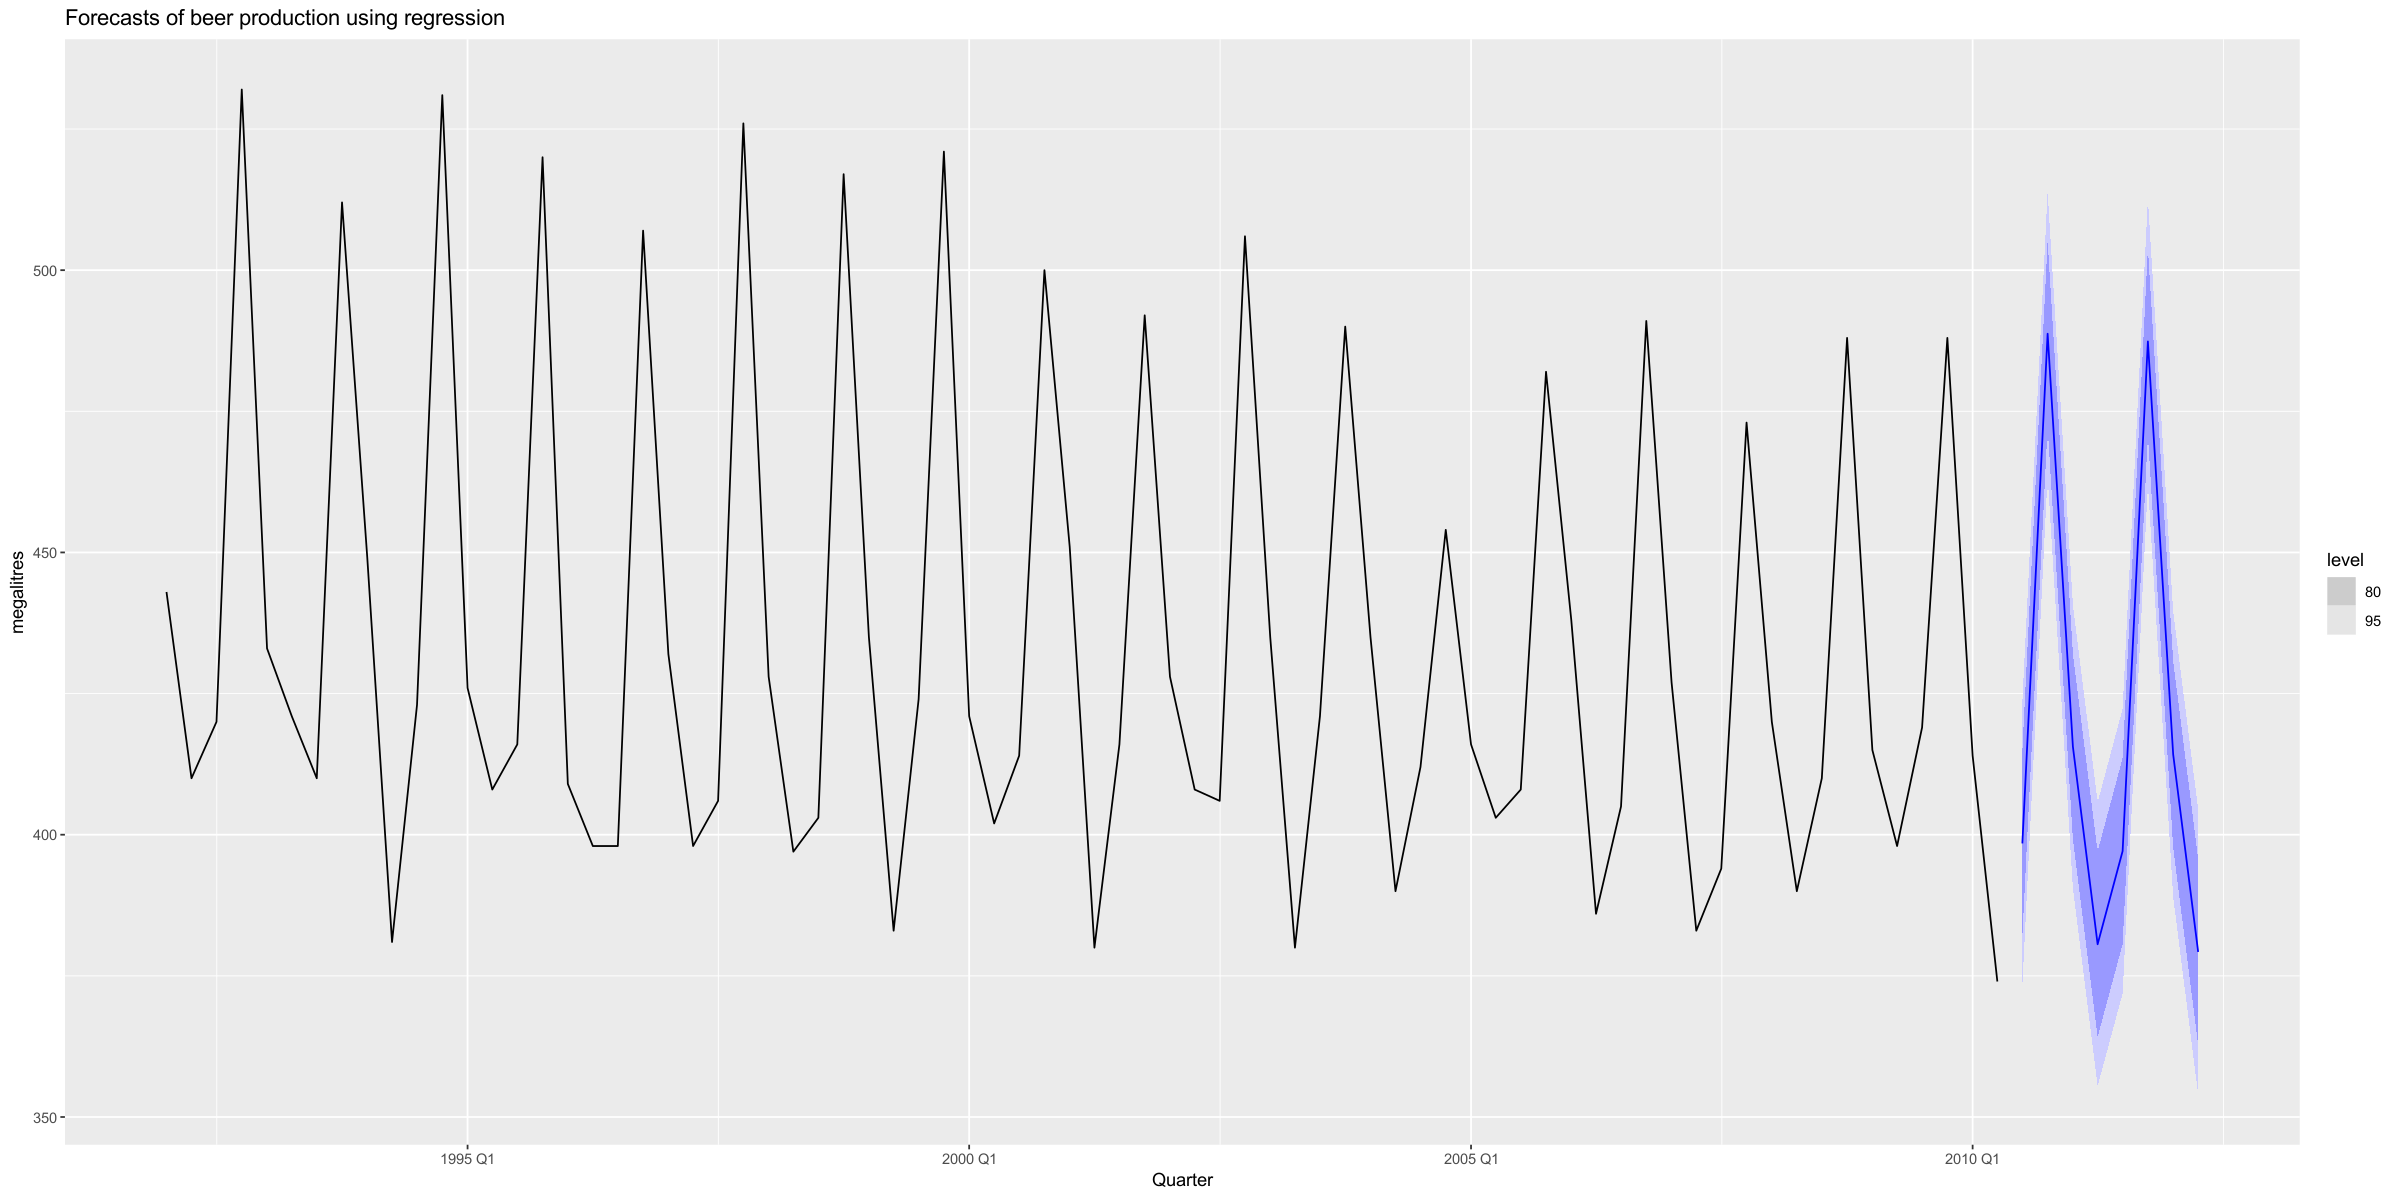

In [33]:
recent_production <- aus_production|>filter(year(Quarter) >= 1992)
fit_beer <- recent_production |> model(TSLM(Beer ~ trend() + season()))
fc_beer <- forecast(fit_beer)
fc_beer|> autoplot(recent_production)+ labs(title = "Forecasts of beer production using regression", y = "megalitres")

In [34]:
# Scenario based forecasting

#In this setting, the forecaster assumes possible scenarios for the predictor variables that are of interest. For example, a US policy maker may be interested in comparing the predicted change in consumption when there is a constant growth of 1% and 0.5% respectively for income and savings with no change in the employment rate, versus a respective decline of 1% and 0.5%, for each of the four quarters following the end of the sample. The resulting forecasts are calculated below and shown in Figure 7.18. We should note that prediction intervals for scenario based forecasts do not include the uncertainty associated with the future values of the predictor variables. They assume that the values of the predictors are known in advance.

In [35]:
fit_consBest <- us_change|> model(lm = TSLM(Consumption ~ Income + Savings + Unemployment))

In [36]:
future_scenarios <- scenarios(Increase = new_data(us_change,4) |> mutate(Income=1, Savings=0.55, Unemployment=0),Decrease = new_data(us_change, 4) |> mutate(Income = -1, Savings = -0.5, Unemployment = 0), names_to = "Scenario")

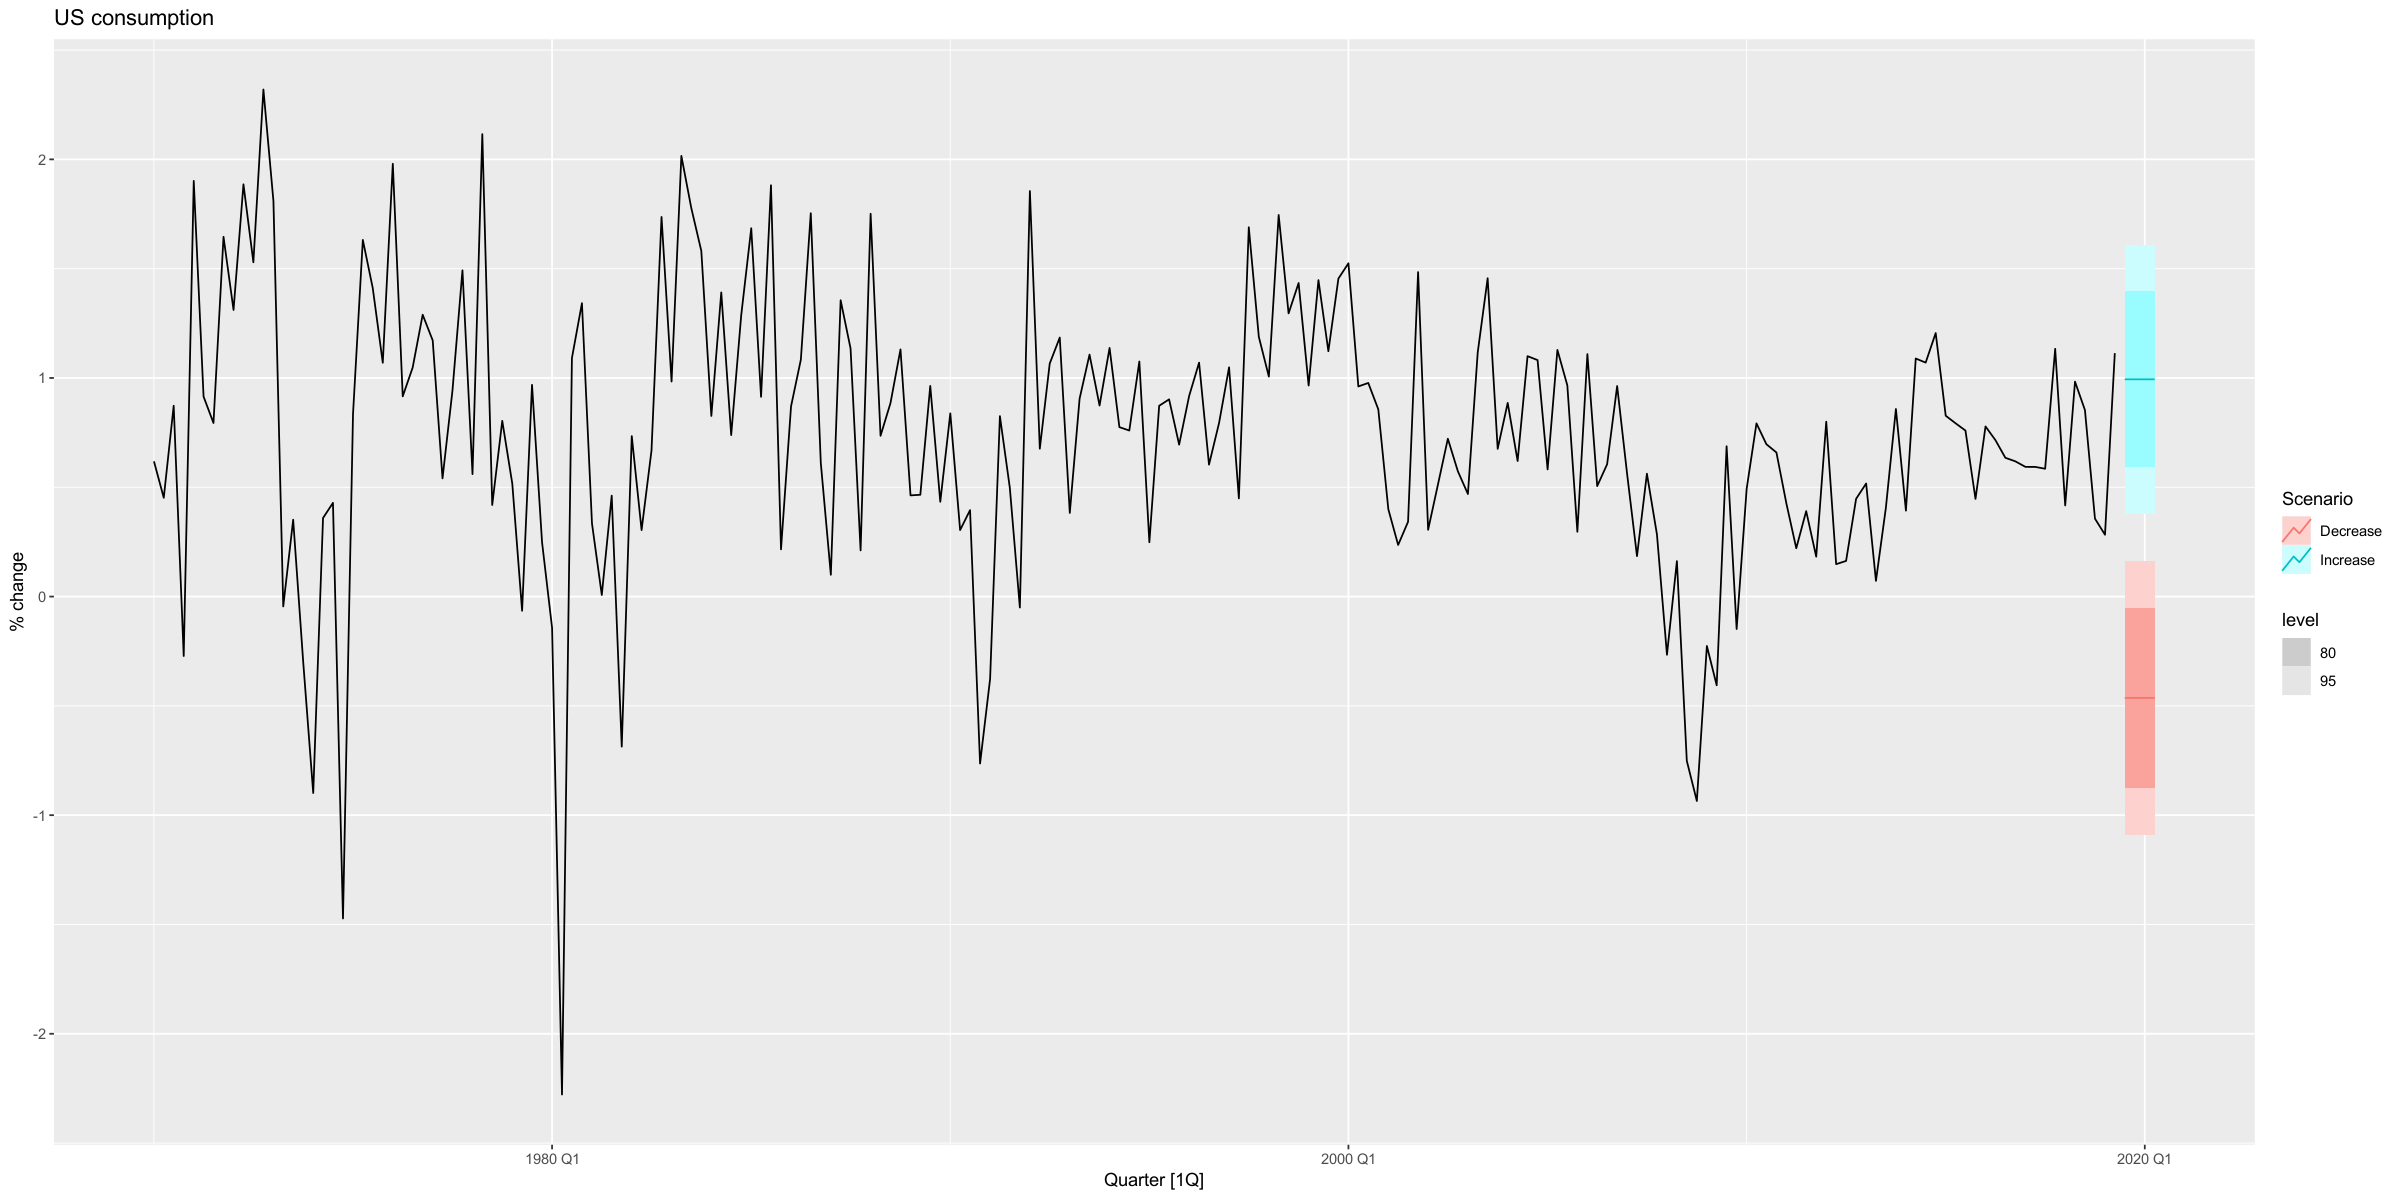

In [37]:
fc <- forecast(fit_consBest, new_data = future_scenarios)
us_change |> autoplot(Consumption) + autolayer(fc) + labs(title="US consumption", y = "% change")

In [38]:
fit_cons <- us_change |> model(TSLM(Consumption ~ Income))

new_cons <- scenarios("Average increase" = new_data(us_change, 4) |>
mutate(Income = mean((us_change$Income)),
"Extreme increase" = new_data(us_change, 4) |>
mutate(Income = 12),
names_to = "Scenario"))

In [39]:
fcast <- forecast(fit_cons, new_cons)

In [40]:
fit_cons

TSLM(Consumption ~ Income)
<model>
<TSLM>


In [41]:
new_cons

$`Average increase`
# A tsibble: 4 x 4 [1Q]
  Quarter Income `Extreme increase`$Quarter $Income names_to
    <qtr>  <dbl>                      <qtr>   <dbl> <chr>   
1 2019 Q3  0.728                    2019 Q3      12 Scenario
2 2019 Q4  0.728                    2019 Q4      12 Scenario
3 2020 Q1  0.728                    2020 Q1      12 Scenario
4 2020 Q2  0.728                    2020 Q2      12 Scenario

attr(,"names_to")
[1] ".scenario"

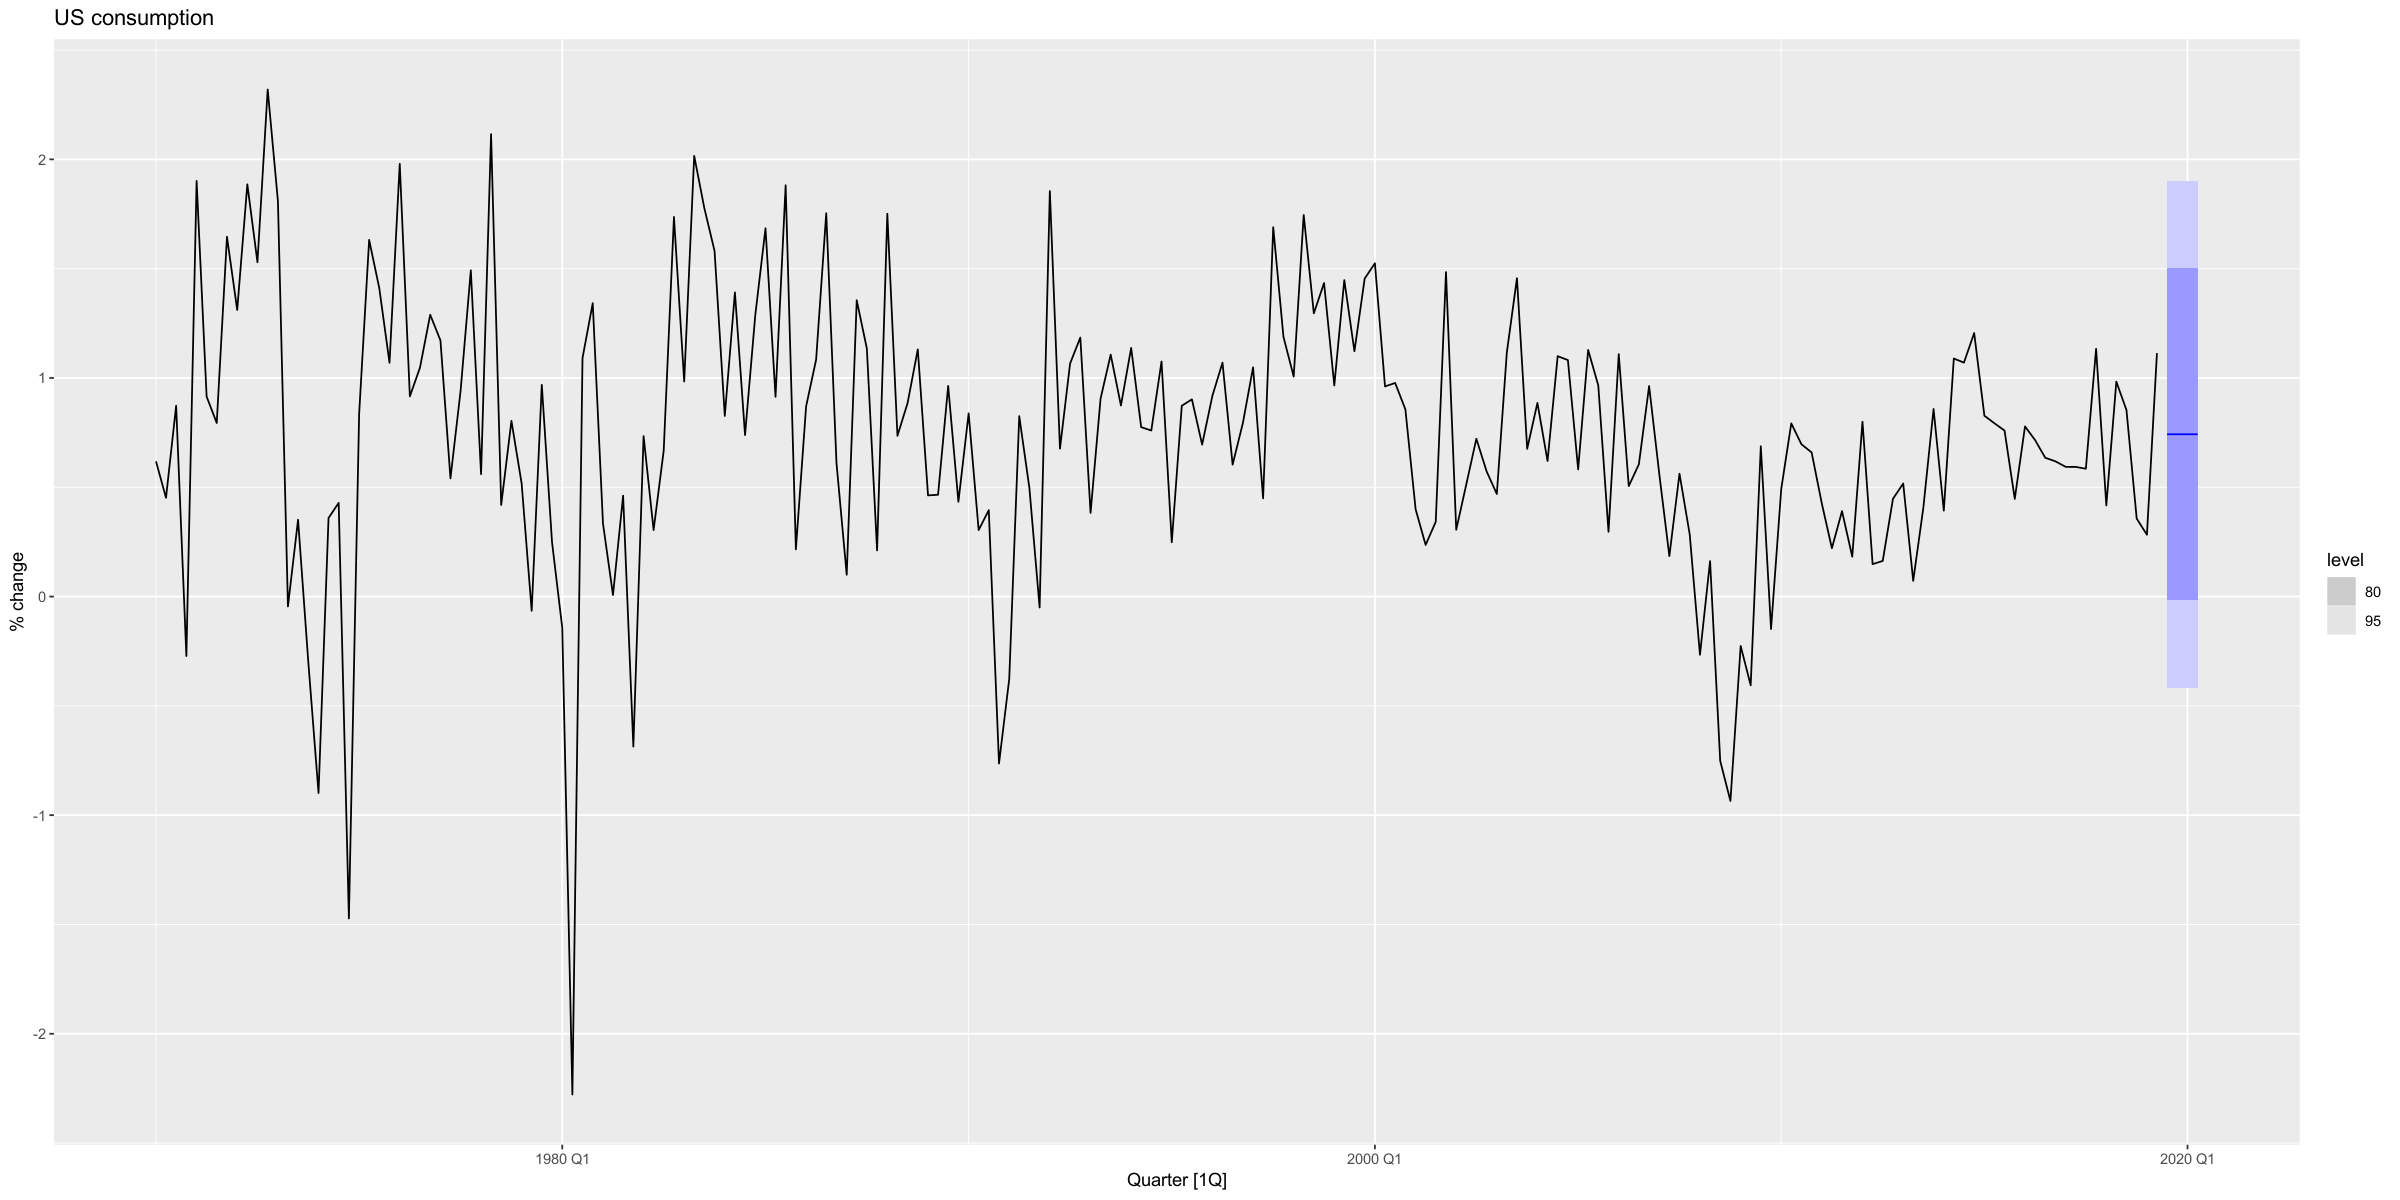

In [42]:
us_change |> autoplot(Consumption) + autolayer(fcast) + labs(title = "US consumption", y = "% change")

7.7 Non Linear Regression

In [ ]:
# Piecewise linear relationships constructed in this wayare a special case of regression splines. In general, a linrear regresssion spline is obtained using

# Forecasting with a mpm;omear trend


# Fitting alinear trend to a time series by setting x = t was introduced. The simplest way of fitting way of fitting a nonlinear trend is using quadratic or higher order trends obtained by specifying

# A Better approach is to use the piecewise specification introduced above and fit a piecewise lienar trend which bends at some point in time. We can think of this aa a nonlinear trend onstructed of linear pieces. If the trend bends at time Tau, then it can be specified by simply replacing x = t and c = Tau above such what we include the predictors,

# x1,t = t
# x2,t = (t - Tau)+  the plus means it refers to the positive term.

In [44]:
# Example: Boston marathon winning times

boston_men <- boston_marathon |> filter(Year >= 1924) |> filter(Event == "Men's open division") |> mutate(Minutes = as.numeric(Time)/60)

Plot variable not specified, automatically selected `.vars = Minutes`


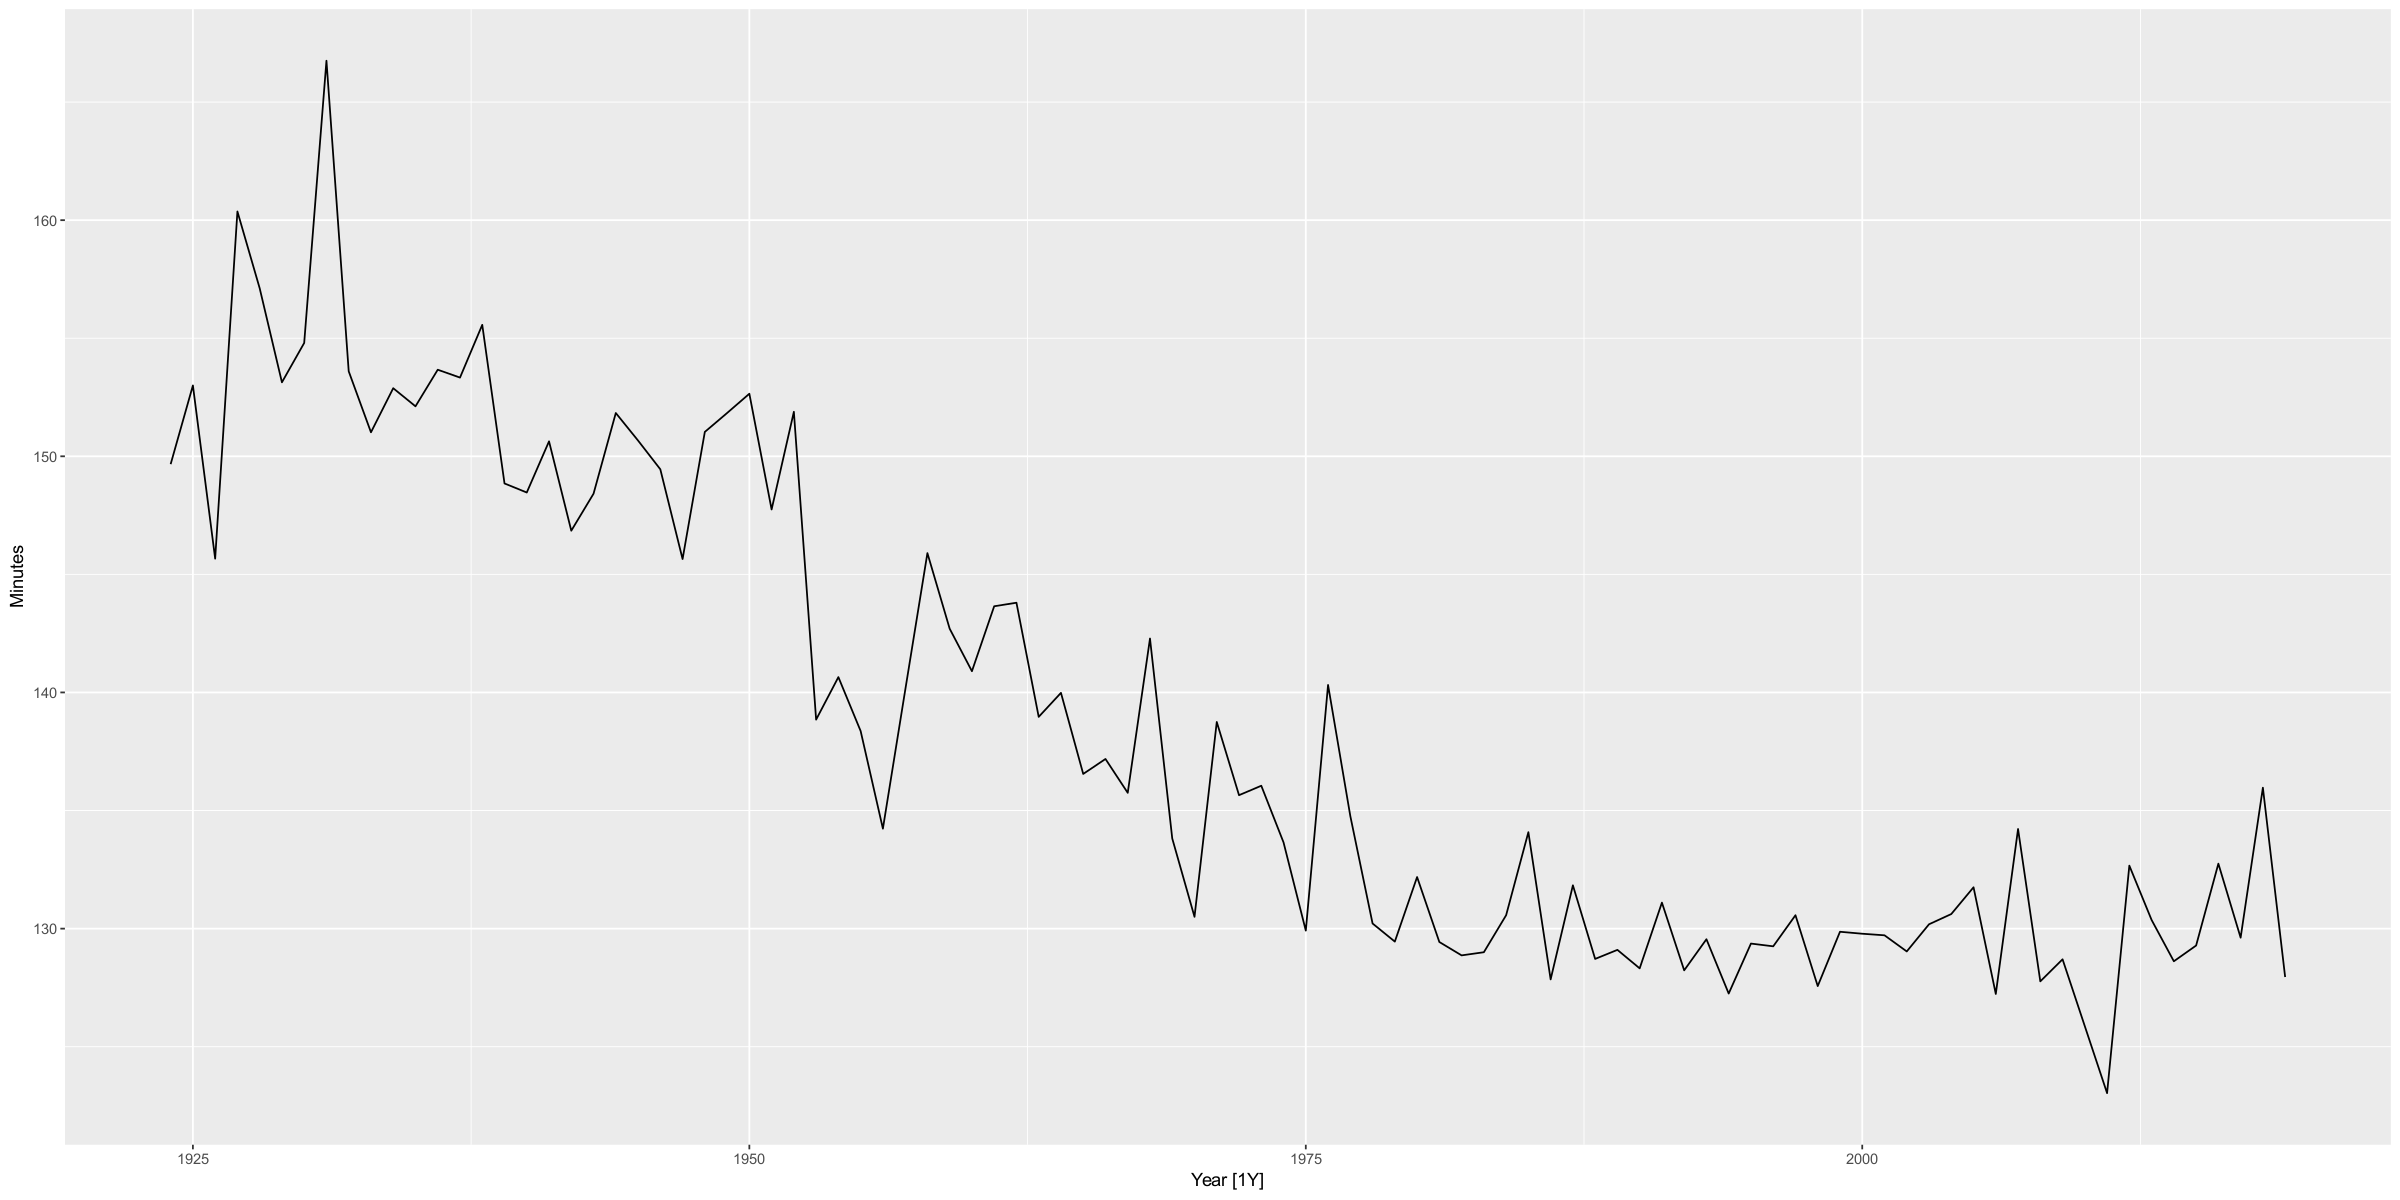

In [45]:
boston_men |> autoplot() + 

In [46]:
fit_trends <- boston_men |> model(linear = TSLM(Minutes ~ trend()),
exponential = TSLM(log(Minutes) ~ trend()),
piecewise = TSLM(Minutes ~ trend(knots = c(1950, 1980))))

In [47]:
fc_trends <- fit_trends |> forecast(h = 10)

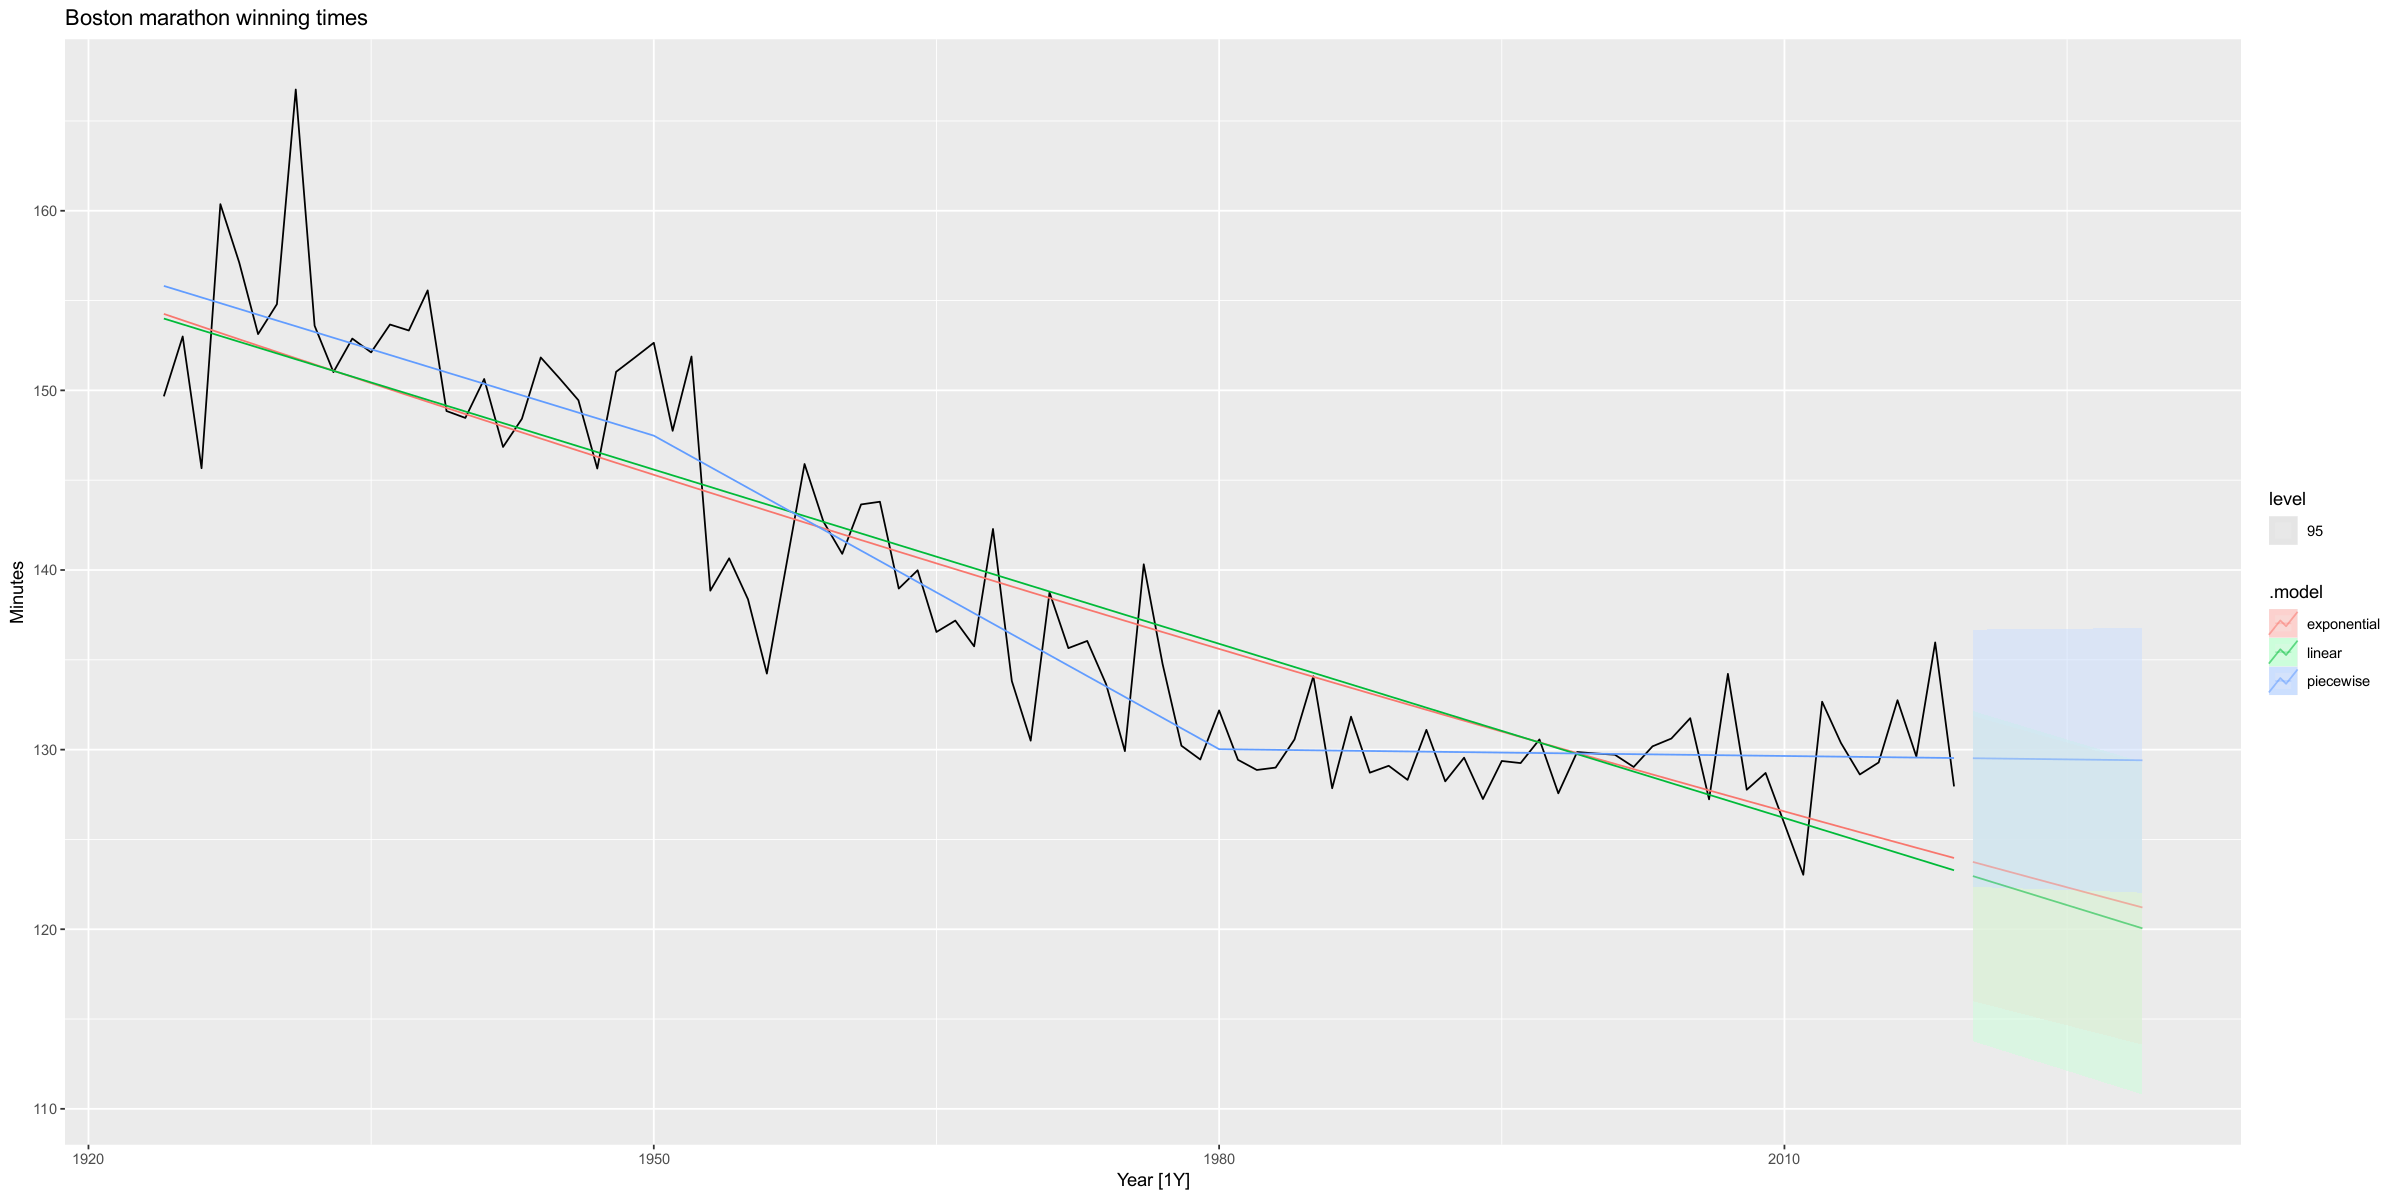

In [49]:
boston_men |> autoplot(Minutes) + geom_line(data = fitted(fit_trends), aes(y = .fitted, colour = .model)) + autolayer(fc_trends, alpha = 0.55, level = 95) + labs(y = "Minutes", title = "Boston marathon winning times")

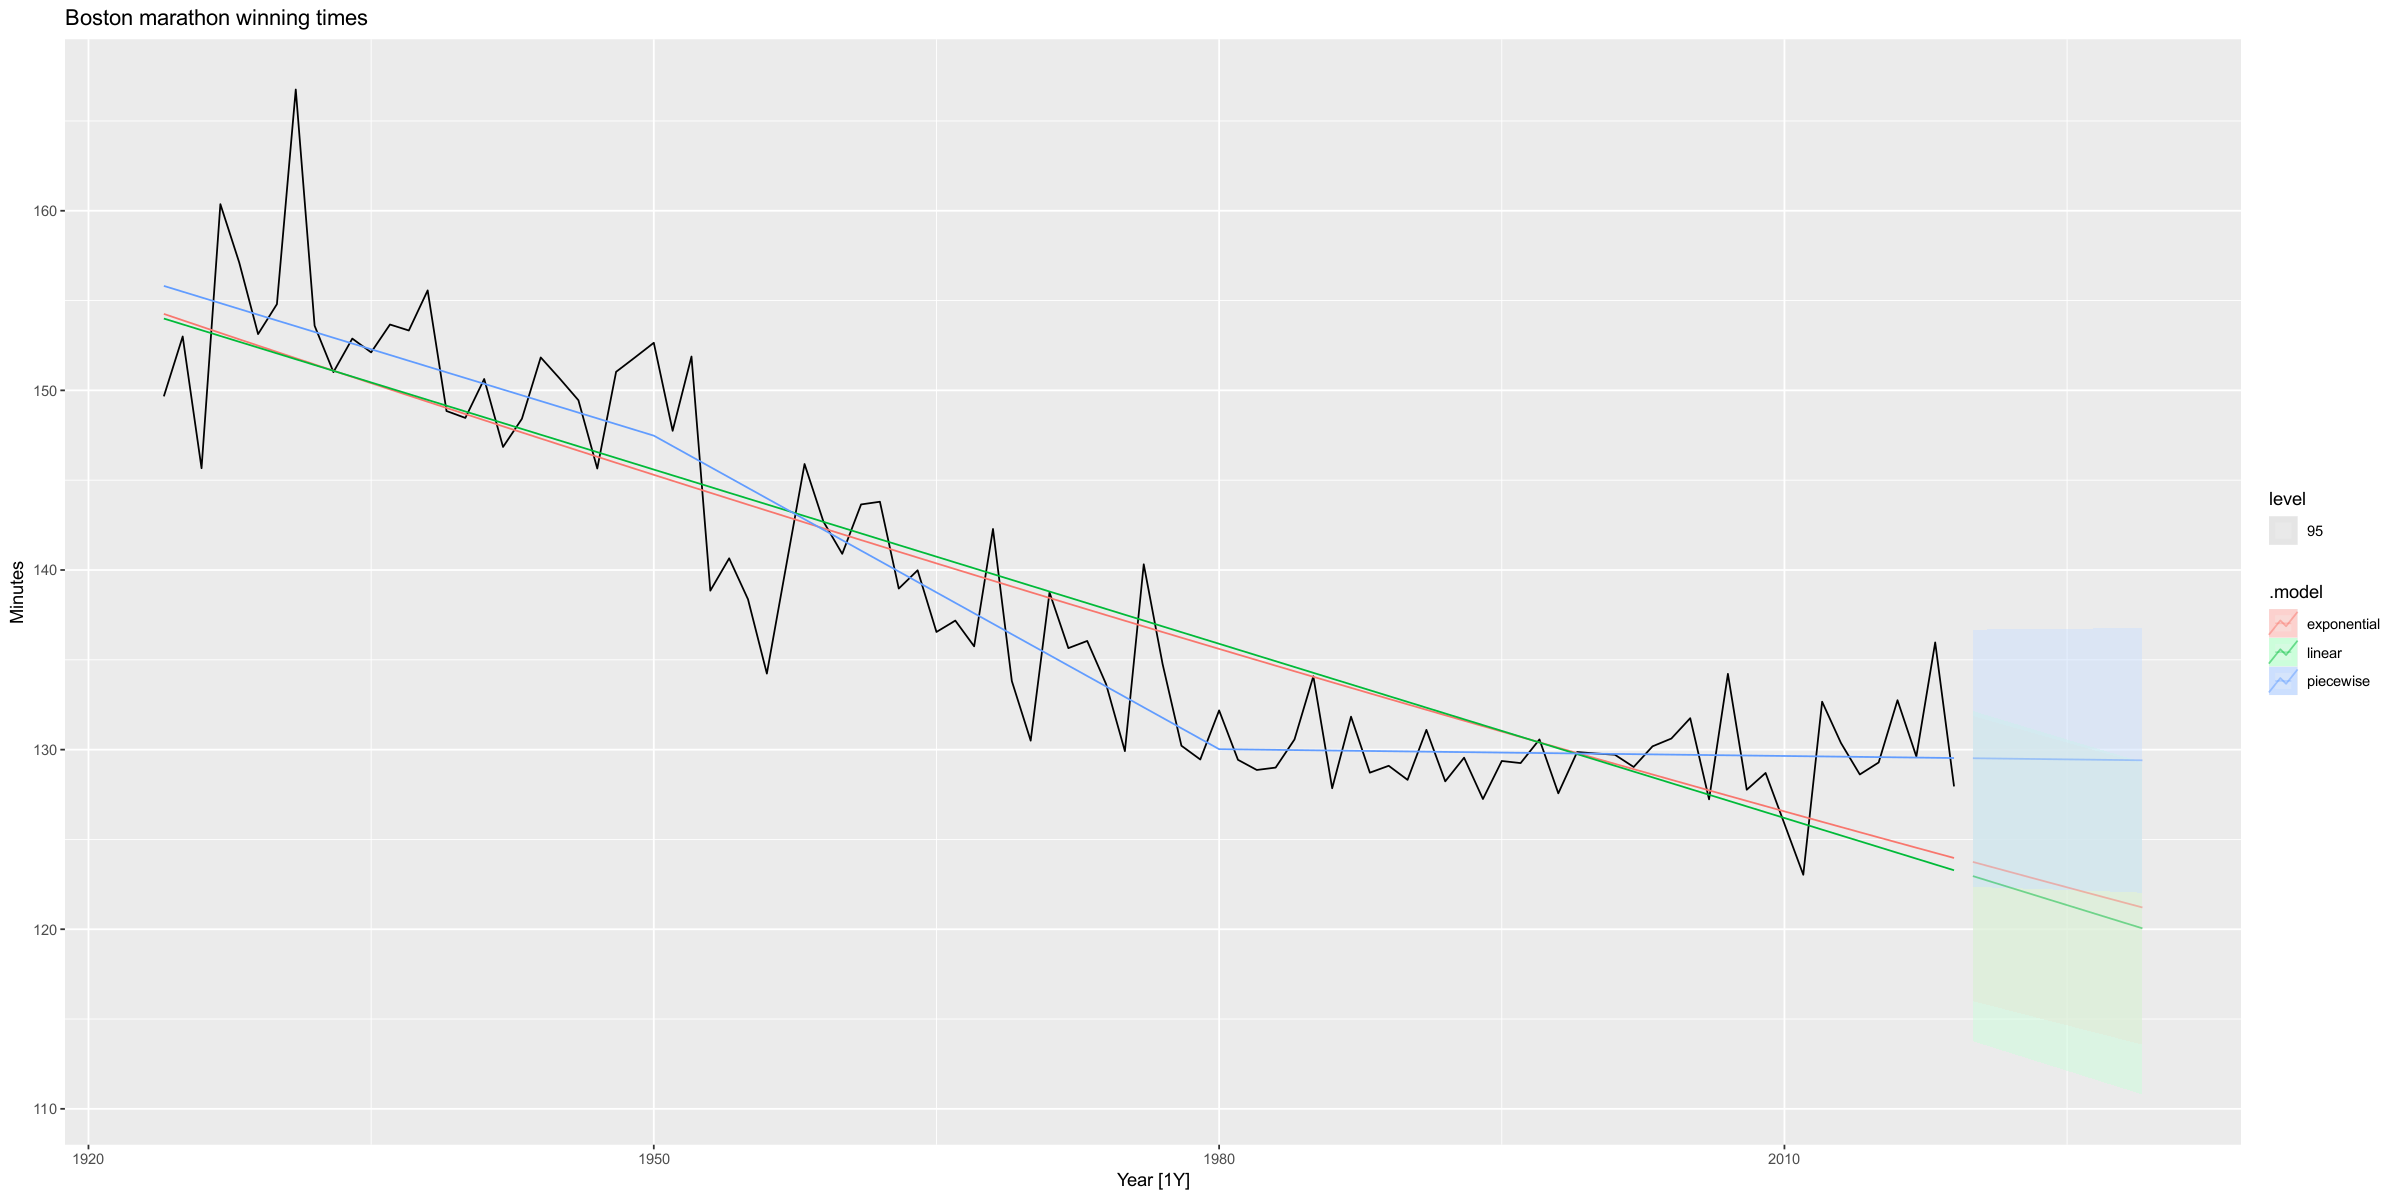

In [51]:
boston_men |> autoplot(Minutes) + geom_line(data = fitted(fit_trends),
aes(y = .fitted, colour = .model)) + autolayer(fc_trends, alpha=0.5, level=95)+
labs(y = "Minutes", title = "Boston marathon winning times")